# IMPORT LIBRARIES

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

## Import Train Dataset 

In [2]:
act = pd.read_csv("C:/Users/Admin/OneDrive - Teesside University/ML ICA/train.csv")

In [3]:
act.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [4]:
act.drop("ClaimNumber", axis='columns')

,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,5,STRUCK KNIFE LACERATED LEFT MIDDLE FINGER LEFT...,1000,480.493308
53996,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,5,LEFT HAND LACERATION LEFT SIDE BACK AND LEFT LEG,1000,755.735319
53997,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,5,METAL SLIPPED ACROSS METAL CUT FINGER,210,418.178461
53998,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,5,BURN WHILST USING SPANNER LACERATION RIGHT MID...,7500,2695.225700


In [5]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                54000 non-null  object 
 1   DateTimeOfAccident         54000 non-null  object 
 2   DateReported               54000 non-null  object 
 3   Age                        54000 non-null  int64  
 4   Gender                     54000 non-null  object 
 5   MaritalStatus              53971 non-null  object 
 6   DependentChildren          54000 non-null  int64  
 7   DependentsOther            54000 non-null  int64  
 8   WeeklyWages                54000 non-null  float64
 9   PartTimeFullTime           54000 non-null  object 
 10  HoursWorkedPerWeek         54000 non-null  float64
 11  DaysWorkedPerWeek          54000 non-null  int64  
 12  ClaimDescription           54000 non-null  object 
 13  InitialIncurredCalimsCost  54000 non-null  int

In [6]:
act.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04
mean,33.842370,0.119185,0.009944,416.364807,37.735084,4.905759,7.841146e+03,1.100337e+04
std,12.122165,0.517780,0.109348,248.638669,12.568704,0.552129,2.058408e+04,3.339099e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02,9.263384e+02
50%,32.000000,0.000000,0.000000,392.200000,38.000000,5.000000,2.000000e+03,3.371242e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03,8.197249e+03
max,81.000000,9.000000,5.000000,7497.000000,640.000000,7.000000,2.000000e+06,4.027136e+06


In [7]:
act.isna().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                29
DependentChildren             0
DependentsOther               0
WeeklyWages                   0
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

# Data Pre-processing

### Fill missing values

In [8]:
act_fill = act.fillna(method='ffill', inplace=True)
act_fill

In [9]:
act.isna().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

### Encoding Columns

In [10]:
act.replace({'Gender':
{'M':0, 'F':1, 'U':2}}, inplace=True)
act.replace({'MaritalStatus':
{'M':0, 'S':1, 'U':2}}, inplace=True)
act.replace({'PartTimeFullTime':
{'P':0, 'F':1}}, inplace=True)

In [11]:
print(act)

      ClaimNumber    DateTimeOfAccident          DateReported  Age  Gender  \
0       WC8285054  2002-04-09T07:00:00Z  2002-07-05T00:00:00Z   48       0   
1       WC6982224  1999-01-07T11:00:00Z  1999-01-20T00:00:00Z   43       1   
2       WC5481426  1996-03-25T00:00:00Z  1996-04-14T00:00:00Z   30       0   
3       WC9775968  2005-06-22T13:00:00Z  2005-07-22T00:00:00Z   41       0   
4       WC2634037  1990-08-29T08:00:00Z  1990-09-27T00:00:00Z   36       0   
...           ...                   ...                   ...  ...     ...   
53995   WC9370727  2004-08-21T18:00:00Z  2004-09-08T00:00:00Z   32       1   
53996   WC8396269  2002-04-28T09:00:00Z  2002-09-03T00:00:00Z   20       1   
53997   WC3609528  1992-02-28T09:00:00Z  1992-03-18T00:00:00Z   19       0   
53998   WC5038565  1995-01-10T07:00:00Z  1995-01-31T00:00:00Z   24       0   
53999   WC2542601  1990-10-24T14:00:00Z  1990-11-03T00:00:00Z   22       0   

       MaritalStatus  DependentChildren  DependentsOther  Weekl

In [12]:
#Drop unncessary columns

act.drop(['ClaimNumber','DateTimeOfAccident', 'DateReported'],axis=1,inplace=True)

In [13]:
act.head(5)

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,48,0,0,0,0,500.00,1,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,43,1,0,0,0,509.34,1,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,30,0,2,0,0,709.10,1,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,41,0,1,0,0,555.46,1,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,36,0,0,0,0,377.10,1,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [14]:
# Claim Cost varies with claim description. 
#This is useful in identifying which types of claim descriptions are associated with higher median incurred claim costs. 
#By examining the output, one can determine which types of claims may require more attention or resources.

act_train = pd.concat([act.assign(role="train")])
act_train[act_train.role=='train'].groupby(['ClaimDescription'])['UltimateIncurredClaimCost'].median().sort_values(ascending=False)

ClaimDescription
SLIPPED ON WET FLOOR FRACTURED BASE OF HAND                   4.027136e+06
WHILST MASSAGING FELT PAIN SOFT TISSUE INJURY LEFT HAND       8.657706e+05
TABLE TIPPED OVER SOFT TISSUE INJURY RIGHT HAND               8.237063e+05
HANDLING BROCOLLI PAIN AND SWELLING LEFT KNEE SOFT TISSUE     5.257133e+05
STAPLED FINGER WITH KNIFE STRESS TRAUMA                       5.164342e+05
                                                                  ...     
METAL FOREIGN BODY LEFT EYE                                   1.423778e+02
HIT AGAINST WELDER MACHINE BRUISED ABRASION RIGHT EYE         1.412889e+02
PARTICLE FELL INTO EYE FOREIGN BODY IN LEFT SHOULDER          1.343203e+02
PARTICLE IN EYE WHILE GRINDING FOREIGN BODY RIGHT EYE AREA    1.314570e+02
GLASS INTO EYE FOREIGN BODY LEFT EYE                          1.245797e+02
Name: UltimateIncurredClaimCost, Length: 28114, dtype: float64

In [15]:
# dispay claim description of the most severe claims
claims_severe = ['UltimateIncurredClaimCost','ClaimDescription']
act[claims_severe].sort_values(by='UltimateIncurredClaimCost', ascending=False).head(10)

,UltimateIncurredClaimCost,ClaimDescription
11027,4.027136e+06,SLIPPED ON WET FLOOR FRACTURED BASE OF HAND
23036,8.657706e+05,WHILST MASSAGING FELT PAIN SOFT TISSUE INJURY ...
37813,8.237063e+05,TABLE TIPPED OVER SOFT TISSUE INJURY RIGHT HAND
3193,7.684851e+05,LIFTING BACK BACK STRAIN
923,7.420032e+05,SHEARING HAND PIECE BLISTER RIGHT HAND
47532,7.414980e+05,LIFTING PARTS STRAIN BACK LOWER BACK STRAIN
28959,7.137841e+05,LIFTING BOX FROM TOOL BOX HERNIA
25148,6.086504e+05,LIFTING DRUM LOWER BACK PAIN
3588,5.869128e+05,LIFTING KEGS LOWER BACK SOFT TISSUE INJURY LOW...
1811,5.584090e+05,CAUGHT BETWEEN DOOR FRAME GRAZE HEAD


In [16]:
# dispay claim description of the least severe claims
act[claims_severe].sort_values(by='UltimateIncurredClaimCost', ascending=True).head(10)

,UltimateIncurredClaimCost,ClaimDescription
24518,121.886805,FOREIGN BODY METAL FRAGMENT LEFT CORNEAL FOREI...
19972,123.164880,PARTICLE FROM DRILL FOREIGN BODY RIGHT EYE
39397,124.579661,GLASS INTO EYE FOREIGN BODY LEFT EYE
18419,129.106130,FOREIGN BODY RUST FOREIGN BODY LEFT EYE
21976,131.457013,PARTICLE IN EYE WHILE GRINDING FOREIGN BODY RI...
13938,132.999557,FOREIGN BODY BLEW INTO EYE FOREIGN BODY RIGHT EAR
27124,134.320350,PARTICLE FELL INTO EYE FOREIGN BODY IN LEFT SH...
1905,138.475198,PARTICLE IN EYE WHILE GRINDING FOREIGN BODY RI...
29977,139.853966,PARTICLE IN EYE WHILE GRINDING FOREIGN BODY LE...
39781,140.182801,PARTICLE FROM GRINDER FOREIGN BODY LEFT EYE


In [17]:
# search for some words and create new features
#For each keyword in text, let it be 1, otherwise 0
text = ['NECK','BACK','KNEE','FINGER','EYE','STRUCK','HAMMER','LADDER','STAIR','FELT','TRAUMA', 'SHOULDER', 'SWELLING']
for name in text:
    act['ClDe_' + name] = np.where( (act['ClaimDescription'].str.find(name) < 0), 0, 1)

# some two or tree word features
act['ClDe_FOREIGN_BODY'] = np.where( (act['ClaimDescription'].str.find('FOREIGN BODY') < 0), 0, 1)
act['ClDe_BACK_STRAIN']  = np.where( (act['ClaimDescription'].str.find('BACK STRAIN') < 0), 0, 1)
act['ClDe_SOFT_TISSUE_'] = np.where( (act['ClaimDescription'].str.find('SOFT TISSUE INJURY') < 0), 0, 1)
act['ClDe_WORKPLACE_STRESS'] = np.where( (act['ClaimDescription'].str.find('WORKPLACE STRESS') < 0), 0, 1)
act['ClDe_LOWER_BACK_STRAIN'] = np.where( (act['ClaimDescription'].str.find('LOWER BACK STRAIN') < 0), 0, 1)

In [18]:
# body side, lacerated/laceration:
act['ClDe_LEFT_RIGHT'] = np.where( ((act['ClaimDescription'].str.find('LEFT') < 0) & (act['ClaimDescription'].str.find('RIGHT') < 0)), 0, 1)
act['ClDe_LACERAT_'] = np.where( (act['ClaimDescription'].str.find('LACERAT') < 0), 0, 1)
act['UltimateIncurredClaimCost'].groupby(act['ClDe_LACERAT_']).agg(['count','median','mean'])

,count,median,mean
ClDe_LACERAT_,,,
0,44419,4512.950433,12589.043701
1,9581,761.570131,3651.936434


#### Removing outliers from the 'UltimateIncurredClaimCost' column

In [19]:
# Print the most expensive claim amounts

ClaimCost = ['UltimateIncurredClaimCost']
print(act[ClaimCost].sort_values(by='UltimateIncurredClaimCost', ascending=False).head(10))

       UltimateIncurredClaimCost
11027               4.027136e+06
23036               8.657706e+05
37813               8.237063e+05
3193                7.684851e+05
923                 7.420032e+05
47532               7.414980e+05
28959               7.137841e+05
25148               6.086504e+05
3588                5.869128e+05
1811                5.584090e+05


In [20]:
# Since the four million outliner may affect samples we limit it to one million.

act['UltimateIncurredClaimCost'] = np.where(act['UltimateIncurredClaimCost'] > 1000000, 1000000., act['UltimateIncurredClaimCost']) * 1.000
act['UltimateIncurredClaimCost'].mean() 


10947.311096062867

In [21]:
print(act)

       Age  Gender  MaritalStatus  DependentChildren  DependentsOther  \
0       48       0              0                  0                0   
1       43       1              0                  0                0   
2       30       0              2                  0                0   
3       41       0              1                  0                0   
4       36       0              0                  0                0   
...    ...     ...            ...                ...              ...   
53995   32       1              1                  0                0   
53996   20       1              1                  0                0   
53997   19       0              1                  0                0   
53998   24       0              1                  0                0   
53999   22       0              1                  0                0   

       WeeklyWages  PartTimeFullTime  HoursWorkedPerWeek  DaysWorkedPerWeek  \
0           500.00                 1        

In [22]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54000 non-null  int64  
 1   Gender                     54000 non-null  int64  
 2   MaritalStatus              54000 non-null  int64  
 3   DependentChildren          54000 non-null  int64  
 4   DependentsOther            54000 non-null  int64  
 5   WeeklyWages                54000 non-null  float64
 6   PartTimeFullTime           54000 non-null  int64  
 7   HoursWorkedPerWeek         54000 non-null  float64
 8   DaysWorkedPerWeek          54000 non-null  int64  
 9   ClaimDescription           54000 non-null  object 
 10  InitialIncurredCalimsCost  54000 non-null  int64  
 11  UltimateIncurredClaimCost  54000 non-null  float64
 12  ClDe_NECK                  54000 non-null  int32  
 13  ClDe_BACK                  54000 non-null  int

In [23]:
#We add the new column 'NumClaimDes' to the train dataset, an we drop the 'ClaimDescription'

# Exploratory Data Analysis


<ipython-input-24-0fc508c596ec>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(column, figsize = (13,5))


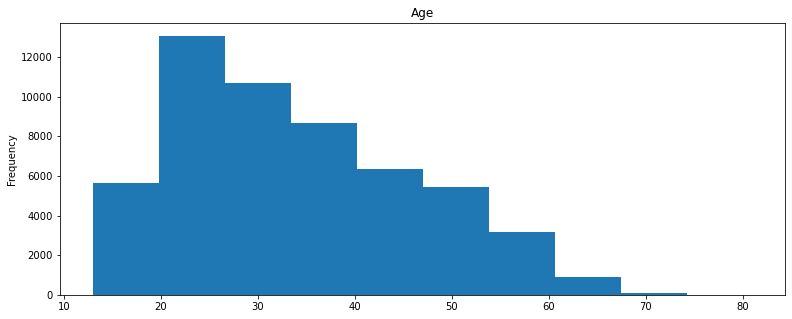

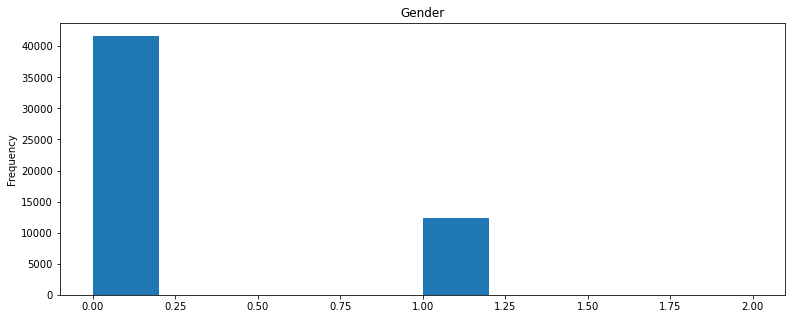

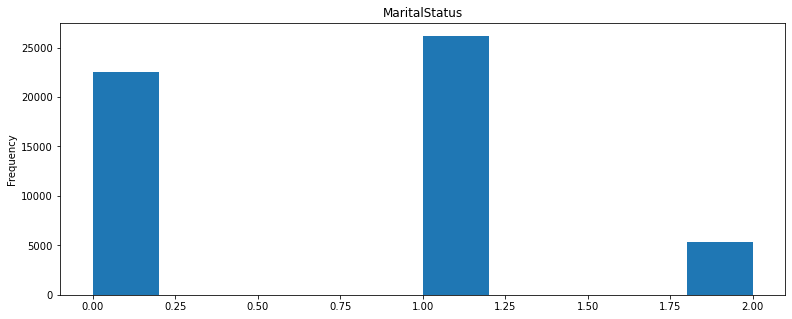

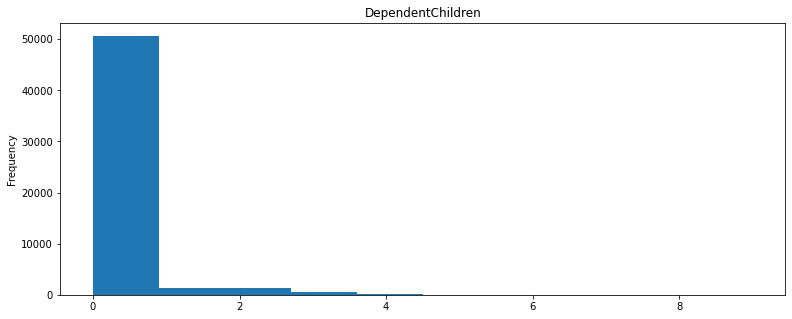

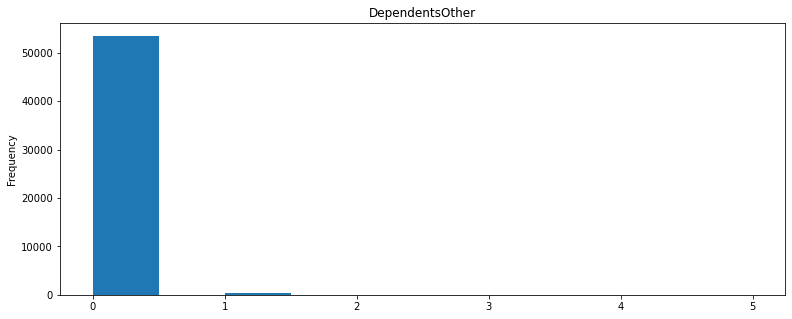

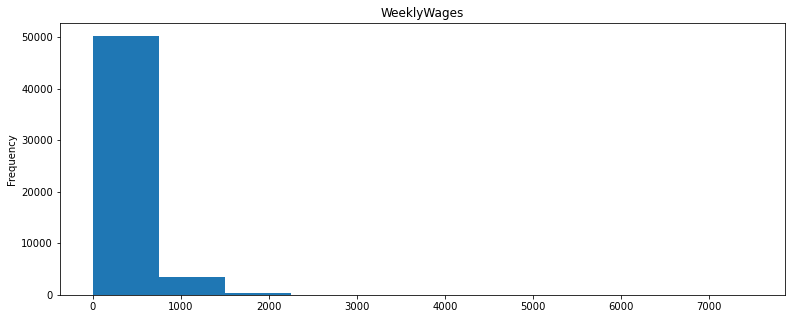

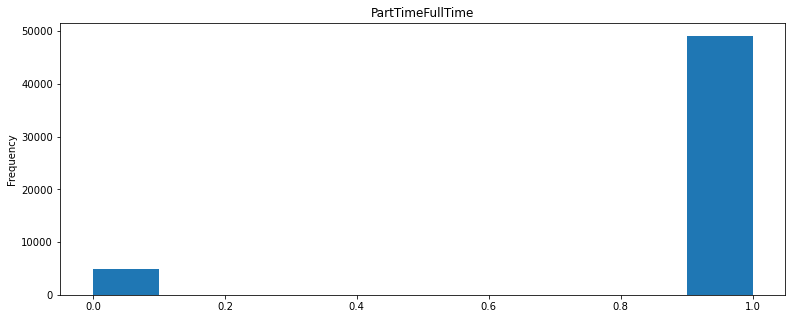

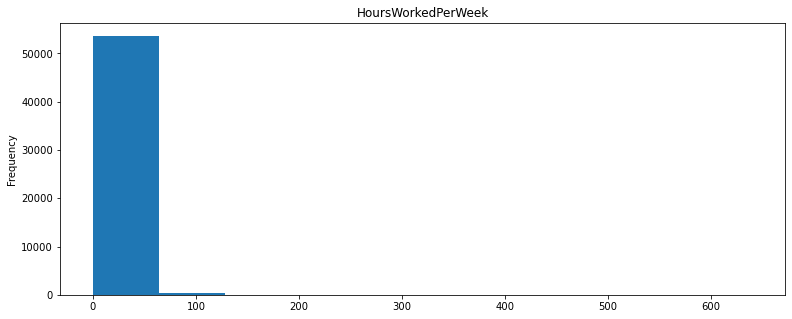

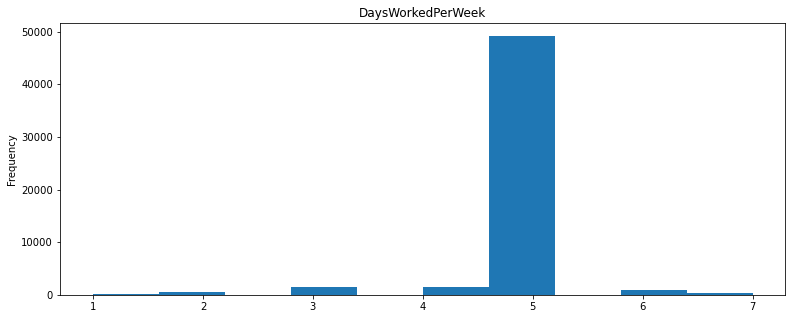

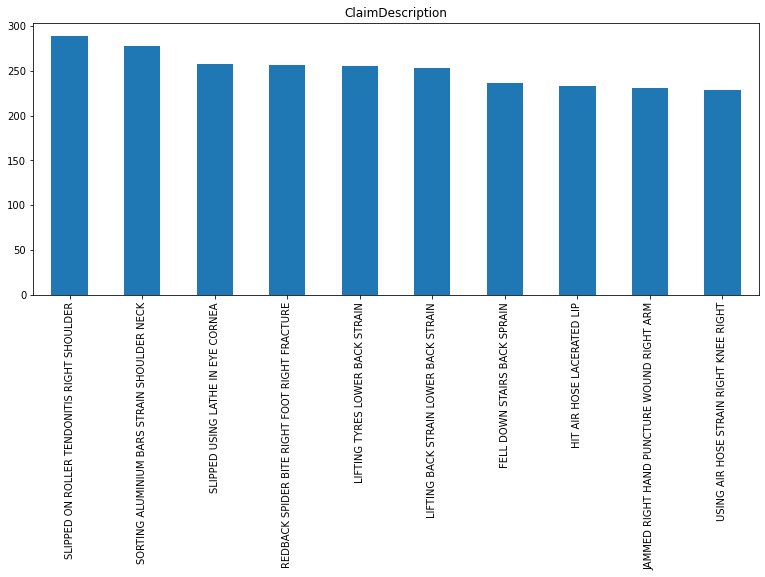

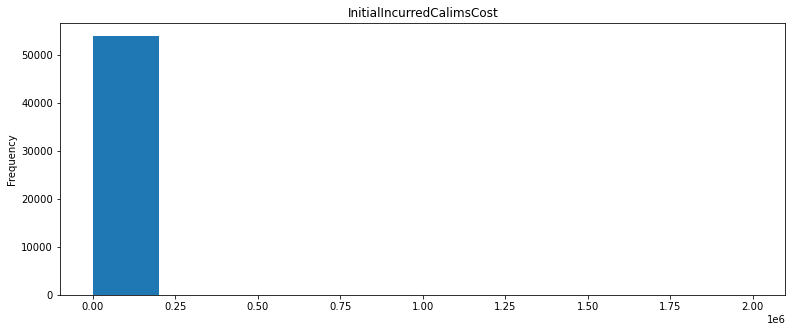

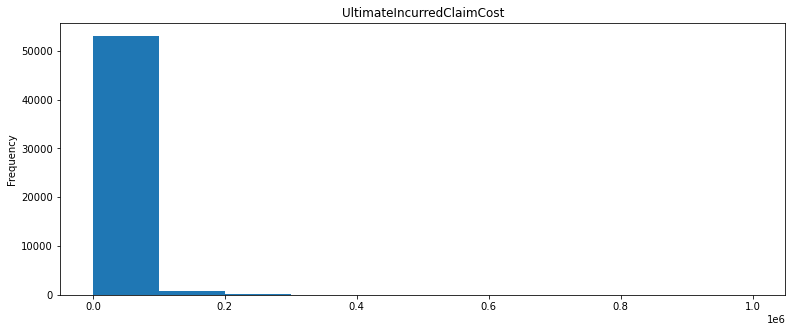

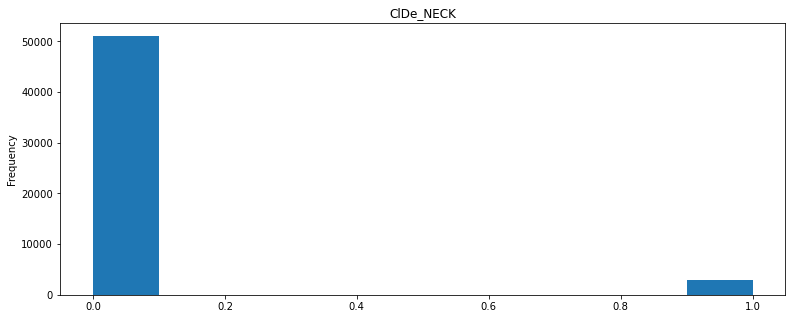

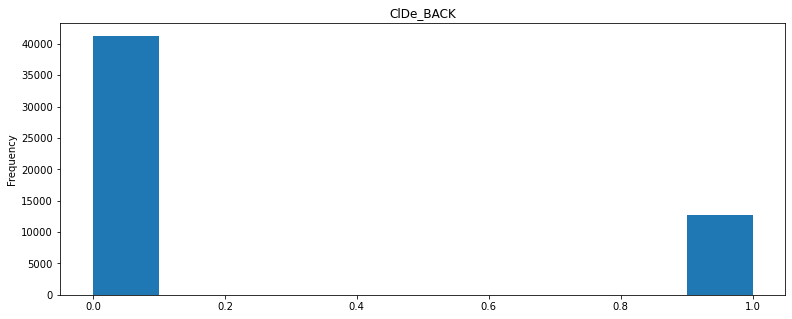

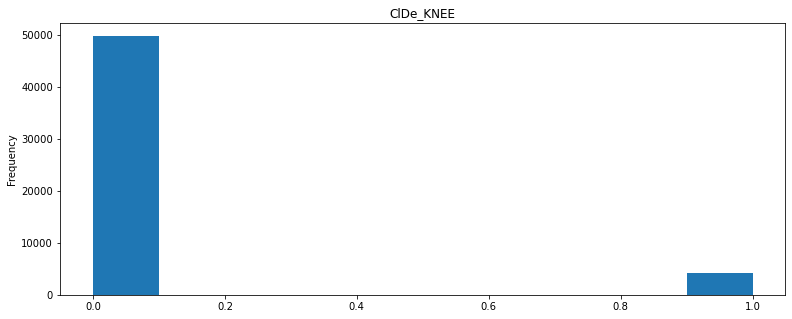

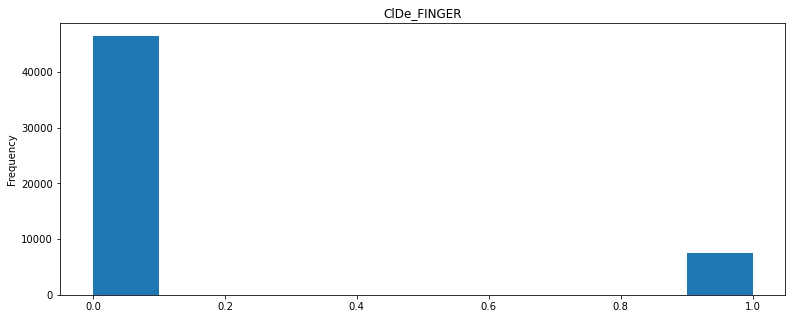

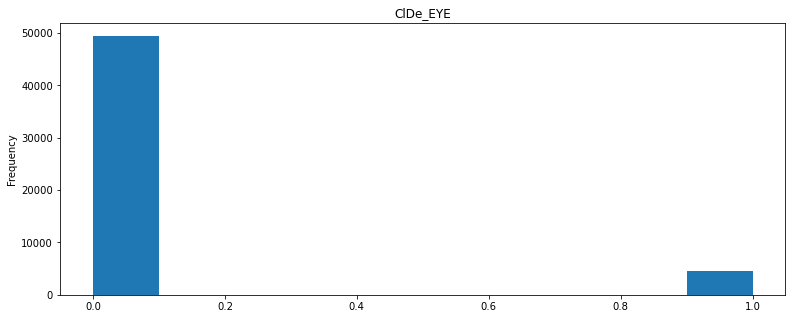

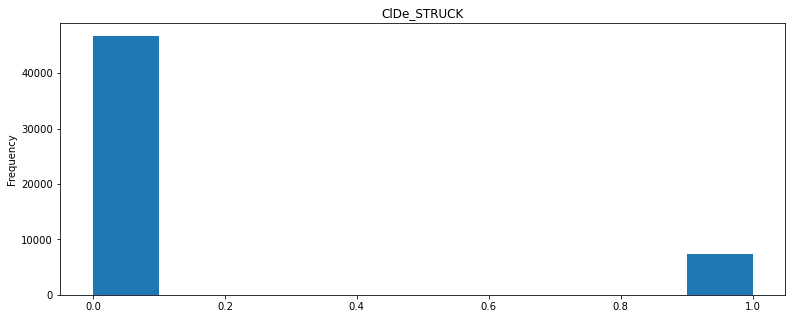

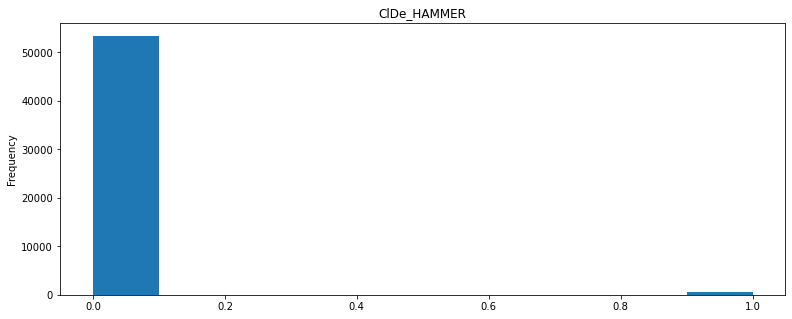

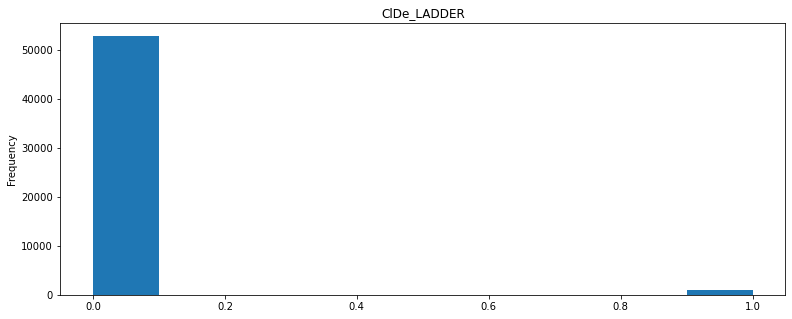

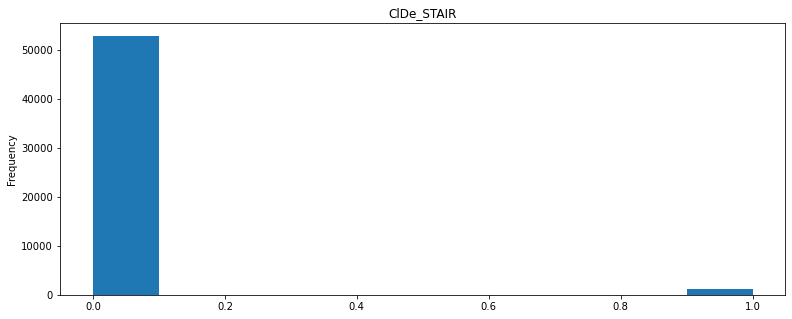

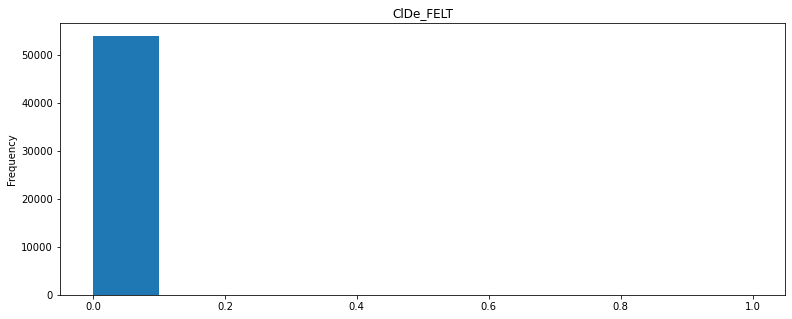

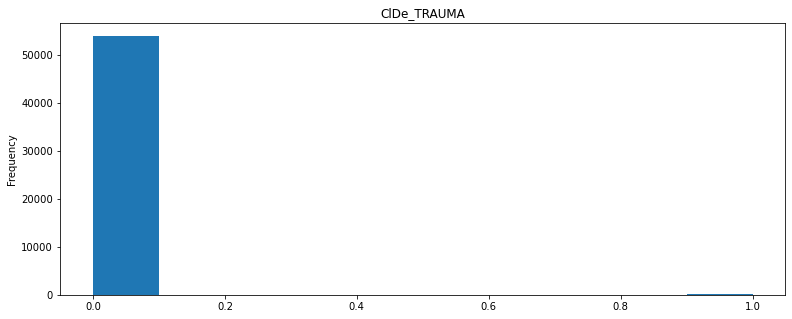

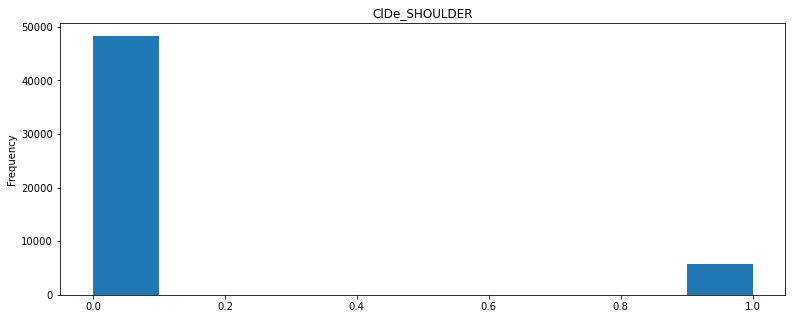

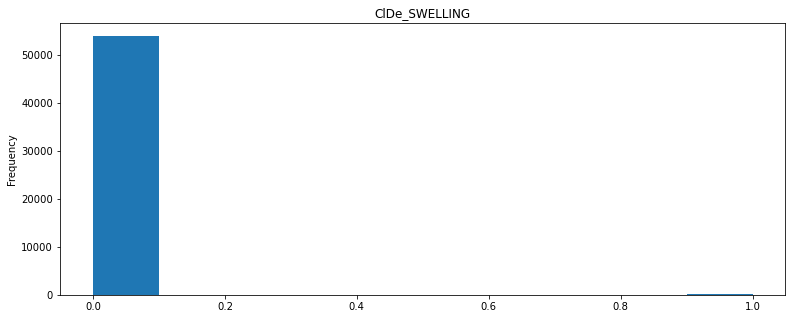

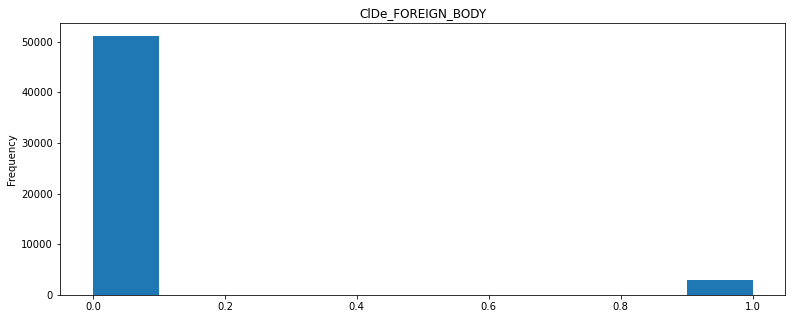

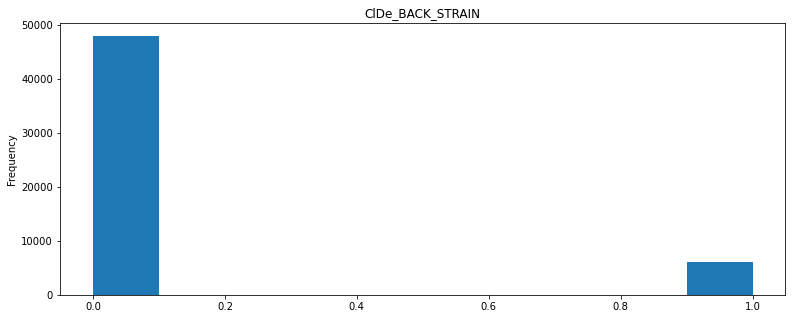

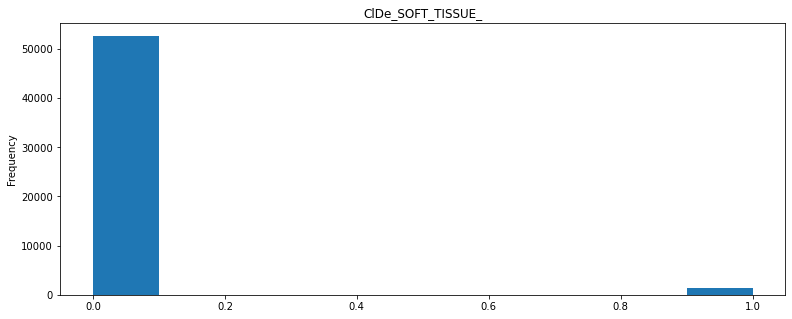

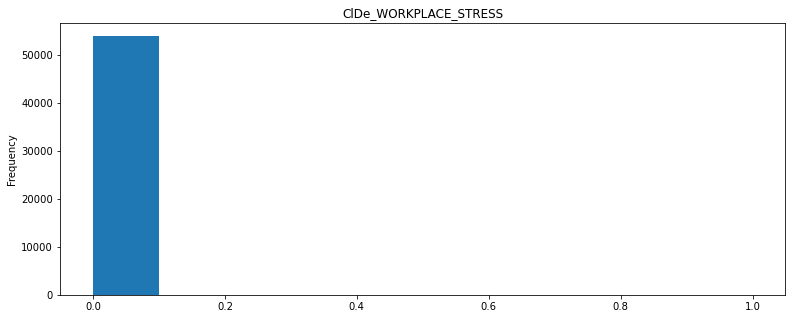

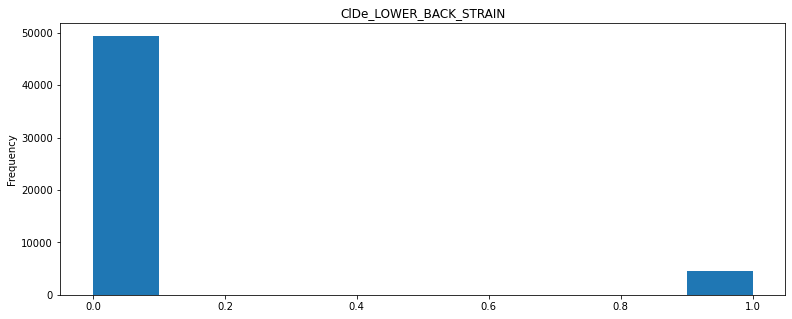

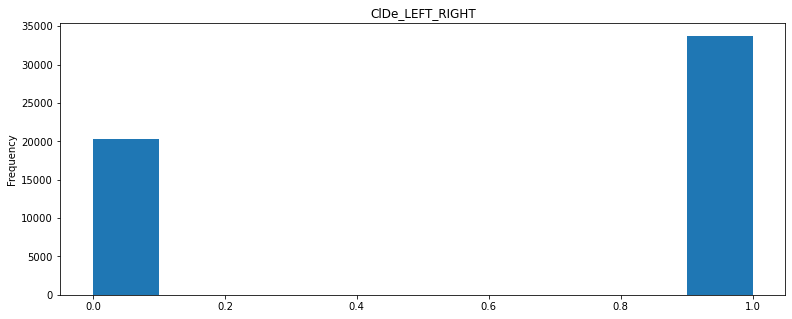

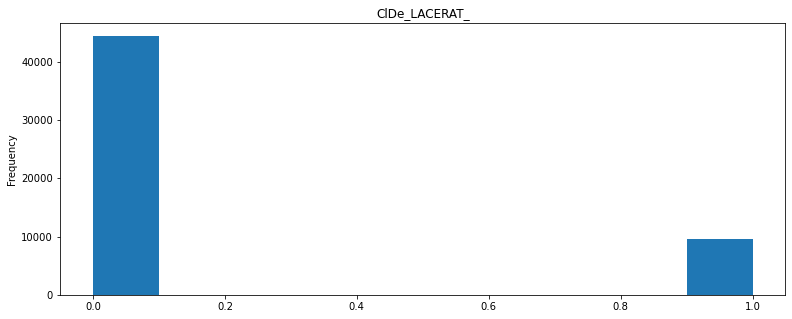

In [24]:
from pandas.core.dtypes.common import is_numeric_dtype
from pandas.core.dtypes.common import is_string_dtype

for column in act:
  plt.figure(column, figsize = (13,5))
  plt.title(column)
  if is_numeric_dtype(act[column]):
   act[column].plot(kind = 'hist')
  elif is_string_dtype(act[column]):
       act[column].value_counts()[:10].plot(kind = 'bar')

In [25]:
sns.set()
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Age', ylabel='Count'>

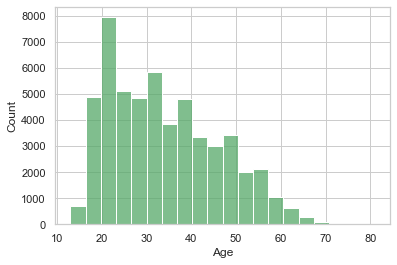

In [26]:
sns.histplot (act.Age, color='g', bins=20)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubplot:title={'center':'DependentChildren'}>,
        <AxesSubplot:title={'center':'DependentsOther'}>,
        <AxesSubplot:title={'center':'WeeklyWages'}>],
       [<AxesSubplot:title={'center':'PartTimeFullTime'}>,
        <AxesSubplot:title={'center':'HoursWorkedPerWeek'}>,
        <AxesSubplot:title={'center':'DaysWorkedPerWeek'}>,
        <AxesSubplot:title={'center':'InitialIncurredCalimsCost'}>,
        <AxesSubplot:title={'center':'UltimateIncurredClaimCost'}>,
        <AxesSubplot:title={'center':'ClDe_NECK'}>],
       [<AxesSubplot:title={'center':'ClDe_BACK'}>,
        <AxesSubplot:title={'center':'ClDe_KNEE'}>,
        <AxesSubplot:title={'center':'ClDe_FINGER'}>,
        <AxesSubplot:title={'center':'ClDe_EYE'}>,
        <AxesSubplot:title={'center':'ClDe_STRUCK'}>,
        <AxesSubplot:title={'center':'ClDe_H

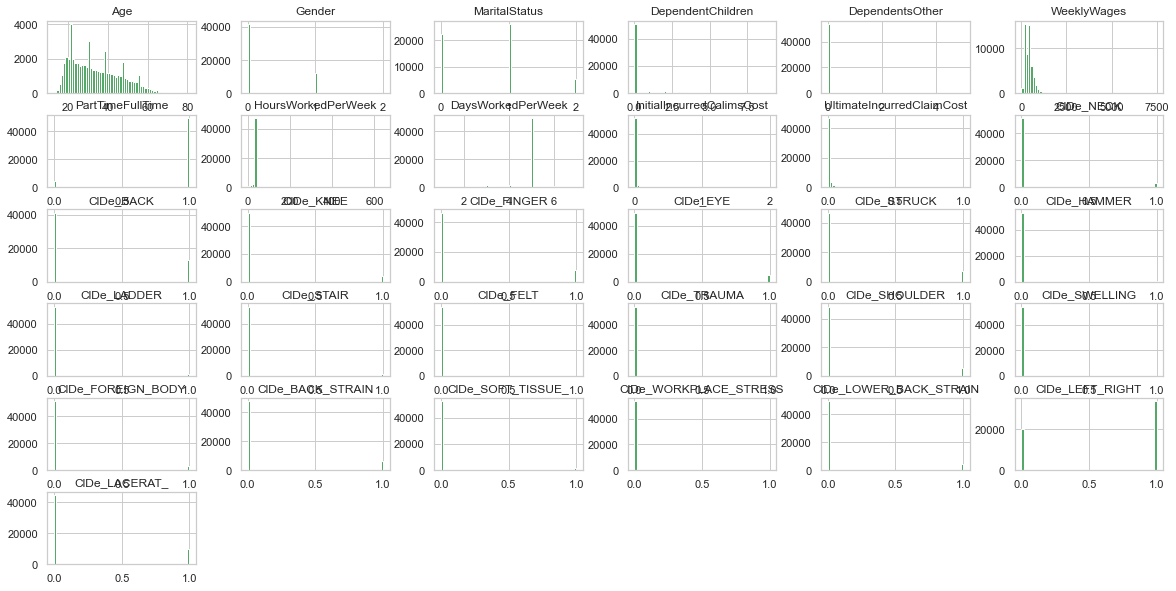

In [27]:
act.hist(figsize=(20,10), color='g', bins=60)

In [28]:
act['UltimateIncurredClaimCost'].value_counts()

1092.841276    2
4217.534423    1
3984.634886    1
7803.181697    1
427.659078     1
              ..
5190.162504    1
1734.412681    1
2953.805381    1
696.189080     1
6270.405174    1
Name: UltimateIncurredClaimCost, Length: 53999, dtype: int64

<AxesSubplot:>

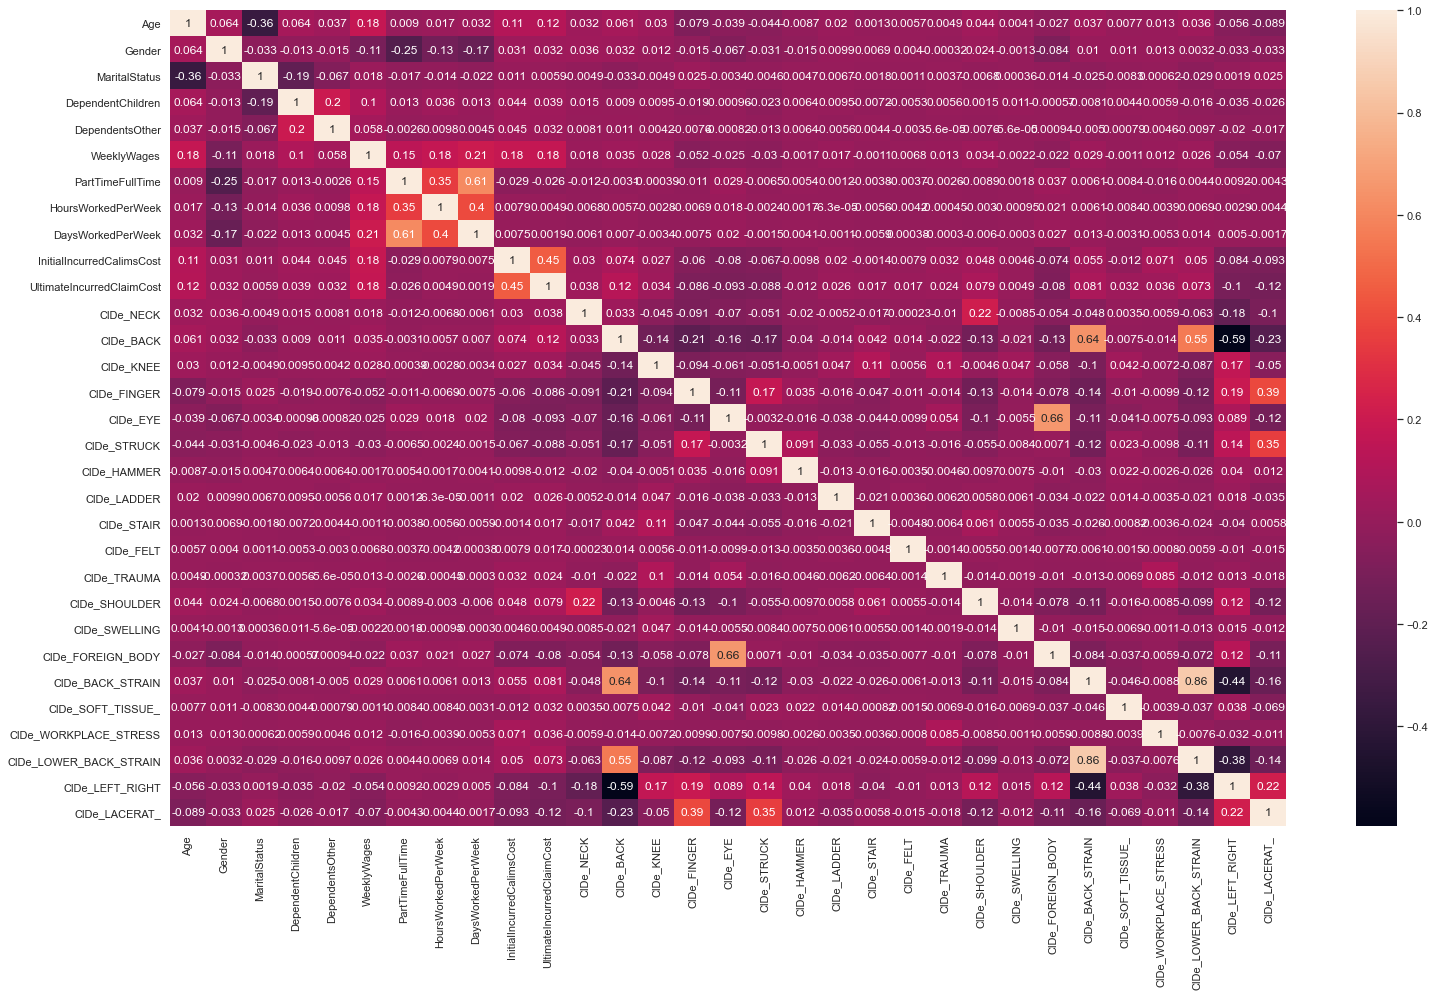

In [31]:
#Relationship Analysis
fig, ax = plt.subplots(figsize=(25, 15))
correlate = act. corr(method='pearson')
sns.heatmap(correlate, xticklabels = correlate.columns, yticklabels = correlate.columns, annot=True, ax=ax)

In [32]:
act['ClaimDescription'].unique()


array(['LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY',
       'STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE LEFT FOREARM',
       'CUT ON SHARP EDGE CUT LEFT THUMB', ...,
       'FELL FLOOR MAT STRAIN LOWER BACK AND NECK',
       'FELL STAIRS BRUISE RIGHT ANKLE AND RIGHT LEG',
       'CUT WITH BREAD KNIFE LACERATION LEFT INDEX AND MIDDLE FINGERS'],
      dtype=object)

In [35]:
print(act.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54000 non-null  int64  
 1   Gender                     54000 non-null  int64  
 2   MaritalStatus              54000 non-null  int64  
 3   DependentChildren          54000 non-null  int64  
 4   DependentsOther            54000 non-null  int64  
 5   WeeklyWages                54000 non-null  float64
 6   PartTimeFullTime           54000 non-null  int64  
 7   HoursWorkedPerWeek         54000 non-null  float64
 8   DaysWorkedPerWeek          54000 non-null  int64  
 9   ClaimDescription           54000 non-null  object 
 10  InitialIncurredCalimsCost  54000 non-null  int64  
 11  UltimateIncurredClaimCost  54000 non-null  float64
 12  ClDe_NECK                  54000 non-null  int32  
 13  ClDe_BACK                  54000 non-null  int

# TEST DATASET PREPROCESSING

In [36]:
#Import test dataset

act_test = pd.read_csv("C:/Users/Admin/OneDrive - Teesside University/ML ICA/test.csv")
print('Number of rows and columns:', act_test.shape)

act_test.head(20)

Number of rows and columns: (36000, 14)


,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,WC8145235,2002-04-02T10:00:00Z,2002-05-07T00:00:00Z,26,M,S,1,0,600.18,F,40.00,5,CAUGHT RIGHT HAND WITH HAMMER BURN TO RIGHT HAND,5300
1,WC2005111,1988-04-06T16:00:00Z,1988-04-15T00:00:00Z,31,M,M,0,0,311.54,F,35.00,5,SPRAINED RIGHT ANKLE FRACTURE RIGHT ELBOW,2000
2,WC6899143,1999-03-08T09:00:00Z,1999-04-04T00:00:00Z,57,M,M,0,0,1000.00,F,38.00,5,STRUCK HAMMER CRUSH INJURY FINGERS HAND,20000
3,WC5502023,1996-07-26T09:00:00Z,1996-09-04T00:00:00Z,33,M,M,0,0,200.00,F,38.00,5,STRUCK AGAINST AIR HOSE STRUCK GLASS LACERATIO...,350
4,WC4785156,1994-04-13T14:00:00Z,1994-07-07T00:00:00Z,32,F,M,0,0,359.60,F,40.00,5,FOREIGN BODY IN RIGHT FOOT BRUISED RIGHT BIG TOE,3000
5,WC7296554,2000-07-13T13:00:00Z,2000-08-26T00:00:00Z,40,M,S,0,0,200.00,F,38.00,5,LIFTING CARRYING ELECTRIC MOTOR STRAINED LOWER...,3500
6,WC9274579,2004-09-08T11:00:00Z,2004-10-14T00:00:00Z,33,M,M,0,0,459.83,F,60.00,6,SLIPPED OFF RAMP STRAIN LEFT LOWER LEG,20000
7,WC7580073,2000-11-15T15:00:00Z,2001-09-20T00:00:00Z,49,M,M,0,0,200.00,F,40.00,5,STRUCK NEEDLE IN GARMENT NEEDLE STICK INJURY T...,500
8,WC5186430,1995-06-11T09:00:00Z,1995-06-24T00:00:00Z,49,M,U,0,0,12.08,F,38.00,5,WHILST DRILLING AND BENDING STRAIN BACK,7500
9,WC8599800,2002-11-03T06:00:00Z,2002-11-29T00:00:00Z,28,F,S,0,0,129.22,P,7.00,6,USING CLEANING CHEMICALS DERMATITIS,40000


In [37]:
act_test.isna().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                18
DependentChildren             0
DependentsOther               0
WeeklyWages                   0
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
dtype: int64

In [38]:
#Filling missing values in 'maritalStatus' column

act_fill_test = act_test.fillna(method='ffill', inplace=True)
act_fill_test

act_test.isna().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [39]:
#Encoding Columns

act_test.replace({'Gender':
{'M':0, 'F':1}}, inplace=True)
act_test.replace({'MaritalStatus':
{'M':0, 'S':1, 'U':2}}, inplace=True)
act_test.replace({'PartTimeFullTime':
{'P':0, 'F':1}}, inplace=True) 

In [40]:
#Drop unncessary columns

act_test.drop(['ClaimNumber','DateTimeOfAccident', 'DateReported'],axis=1,inplace=True)

In [41]:
act_test.head(5)

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,26,0,1,1,0,600.18,1,40.0,5,CAUGHT RIGHT HAND WITH HAMMER BURN TO RIGHT HAND,5300
1,31,0,0,0,0,311.54,1,35.0,5,SPRAINED RIGHT ANKLE FRACTURE RIGHT ELBOW,2000
2,57,0,0,0,0,1000.00,1,38.0,5,STRUCK HAMMER CRUSH INJURY FINGERS HAND,20000
3,33,0,0,0,0,200.00,1,38.0,5,STRUCK AGAINST AIR HOSE STRUCK GLASS LACERATIO...,350
4,32,1,0,0,0,359.60,1,40.0,5,FOREIGN BODY IN RIGHT FOOT BRUISED RIGHT BIG TOE,3000


## Data Preparation for Modelling

In [42]:
# dispay claim description of a) the most severe claims
claims_severe1 = ['InitialIncurredCalimsCost','ClaimDescription']
act_test[claims_severe1].sort_values(by='InitialIncurredCalimsCost', ascending=False).head(10)

,InitialIncurredCalimsCost,ClaimDescription
25368,725000,MOTOR VEHICLE ACCIDENT BRUISED NECK KNEE AND T...
32320,530000,CRUSHED HAND UNDER DOOR INJURY TO BACK
12304,500000,REPETITIVE HEAVY LIFTING LOWER BACK INJURY
11095,425000,FALL FROM STEP LADDER BACK STRAIN
22066,405000,LIFTING PUSHING PIPE STRAIN CONTUSION LEFT SHO...
15058,380000,GARNET BLEW OFF OXY TORCH BURN LEFT CORNEA
8883,350000,SLIP ON DEGREASING OIL RIB ELBOW AND BACK STRAIN
5922,334000,BENDING DOWN AT WORK BURNED FEET AND LOWER BACK
10842,315000,LIFTING LEG OFF FORKLIFT TWISTED RIGHT KNEE
35042,315000,STRUCK METAL CLAMP FRACTURE LEFT WRIST


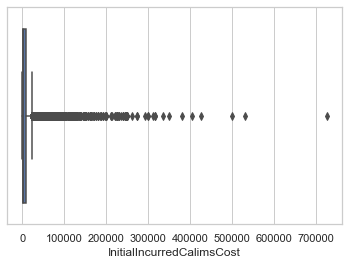

In [43]:
ax = sns.boxplot(x="InitialIncurredCalimsCost", data=act_test)

In [44]:
# Since the four million outliner may affect samples we limit it to one million.

act_test['InitialIncurredCalimsCost'] = np.where(act_test['InitialIncurredCalimsCost'] > 530000, 530000., act_test['InitialIncurredCalimsCost']) * 1.000
act_test['InitialIncurredCalimsCost'].mean() 


7673.890222222222

In [45]:
# Very basis text processing: claim description features

# create new features for some "cheap" or "expensive" words 
for name in text:
    act_test['ClDe_' + name] = np.where( (act_test['ClaimDescription'].str.find(name) < 0), 0, 1)

# some two or tree word features
act_test['ClDe_FOREIGN_BODY'] = np.where( (act_test['ClaimDescription'].str.find('FOREIGN BODY') < 0), 0, 1)
act_test['ClDe_BACK_STRAIN']  = np.where( (act_test['ClaimDescription'].str.find('BACK STRAIN') < 0), 0, 1)
act_test['ClDe_SOFT_TISSUE_'] = np.where( (act_test['ClaimDescription'].str.find('SOFT TISSUE INJURY') < 0), 0, 1)
act_test['ClDe_WORKPLACE_STRESS'] = np.where( (act_test['ClaimDescription'].str.find('WORKPLACE STRESS') < 0), 0, 1)
act_test['ClDe_LOWER_BACK_STRAIN'] = np.where( (act_test['ClaimDescription'].str.find('LOWER BACK STRAIN') < 0), 0, 1)

# body side, lacerated/laceration:
act_test['ClDe_LEFT_RIGHT'] = np.where( ((act_test['ClaimDescription'].str.find('LEFT') < 0) & (act_test['ClaimDescription'].str.find('RIGHT') < 0)), 0, 1)
act_test['ClDe_LACERAT_'] = np.where( (act_test['ClaimDescription'].str.find('LACERAT') < 0), 0, 1)

In [46]:
act_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        36000 non-null  int64  
 1   Gender                     36000 non-null  int64  
 2   MaritalStatus              36000 non-null  int64  
 3   DependentChildren          36000 non-null  int64  
 4   DependentsOther            36000 non-null  int64  
 5   WeeklyWages                36000 non-null  float64
 6   PartTimeFullTime           36000 non-null  int64  
 7   HoursWorkedPerWeek         36000 non-null  float64
 8   DaysWorkedPerWeek          36000 non-null  int64  
 9   ClaimDescription           36000 non-null  object 
 10  InitialIncurredCalimsCost  36000 non-null  float64
 11  ClDe_NECK                  36000 non-null  int32  
 12  ClDe_BACK                  36000 non-null  int32  
 13  ClDe_KNEE                  36000 non-null  int

In [47]:
act_test.drop(['ClDe_NECK', 'ClDe_BACK', 'ClDe_KNEE', 'ClDe_FINGER','ClDe_EYE', 'ClDe_STRUCK', 'ClDe_HAMMER', 'ClDe_LADDER', 'ClDe_STAIR', 'ClDe_FELT', 'ClDe_TRAUMA', 'ClDe_SHOULDER', 'ClDe_SWELLING', 'ClDe_FOREIGN_BODY', 'ClDe_BACK_STRAIN', 'ClDe_SOFT_TISSUE_', 'ClDe_WORKPLACE_STRESS', 'ClDe_LOWER_BACK_STRAIN',  'ClDe_LEFT_RIGHT'],axis=1,inplace=True)

## SPLITTING THE DATA INTO TRAIN AND TEST SET 

In [48]:
# Separate feature columns and target column
# We have freedom to chose features on which we want to train our model
X = act[['Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClDe_LACERAT_', 'InitialIncurredCalimsCost']] # feature columns
y = act['UltimateIncurredClaimCost'] # target column

In [49]:
from sklearn.model_selection import train_test_split

# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [50]:
print("Original shape of dataset: {}".format(act.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape)) # shape of testing dataset after split

Original shape of dataset: (54000, 32)
Shape of training dataset: (43200, 11)
Shape of testing dataset: (10800, 11)


In [51]:
from sklearn.preprocessing import RobustScaler
# Robust scaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [52]:
#Import PCA
from sklearn.decomposition import PCA

#instansiate a PCA object for the trained dataset
pca = PCA(n_components=8)

#fit the data to the model
pca.fit(X_train)

#transform the data
act_X_train = pca.transform(X_train)
act_X_test = pca.transform(X_test)

#print the transformed data
print(act_X_train)
print(act_X_test)

[[ 0.13868695 -0.91646568 -0.53432857 ... -0.0504467  -0.37332465
  -0.33686236]
 [ 0.19061714  6.48991341 -0.50722875 ... -0.53605688  0.7422818
  -0.30480342]
 [ 1.15768529 -0.23933327 -0.11864068 ...  0.04293491 -0.16654252
  -0.28685067]
 ...
 [ 1.16962332 -0.55571205  0.65782883 ... -0.15175378 -0.30227924
  -0.16800328]
 [ 0.13608369 -0.90131179 -0.78780372 ...  0.0331569  -0.02900119
  -0.10978709]
 [-8.92330514 -0.67041272 -0.06082074 ...  2.36622019  0.35193836
  -0.60309648]]
[[ 0.16962507 -0.17404995  0.40499036 ...  0.48668438  0.77253887
  -0.18880767]
 [ 1.15998235 -0.78586873  0.06477857 ...  0.2214524  -0.28185199
  -0.04093495]
 [ 0.13198834 -0.73430258 -0.76260202 ...  0.18439412 -0.19721909
   0.68384424]
 ...
 [ 0.15762152 -0.48580105 -0.0418842  ... -0.3487093   0.62375744
  -0.19314629]
 [ 0.18066403  0.95957401  0.55161776 ...  0.17077619 -0.63777797
  -0.07623639]
 [ 0.11838365 -0.9155054  -0.89318993 ...  0.25365285 -0.18234651
  -0.06210373]]


## 1. LINEAR REGRESSION

In [53]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

# Define the parameter grid to search
param_grid = {'normalize': [True, False]}

# Define the scoring metrics to use
scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'}

# Perform grid search
grid = GridSearchCV(lin, param_grid, scoring=scoring, refit='r2', cv=5)
grid.fit(act_X_train, y_train)

# Print the results
print(f"Best params: {grid.best_params_}")
print(f"Best R2 score: {grid.best_score_:.3f}")
print(f"Best MAE: {-grid.cv_results_['mean_test_mae'][grid.best_index_]:.3f}")

Best params: {'normalize': True}
Best R2 score: 0.202
Best MAE: 8423.187


## 2. K NEAREST NEIGHBOR REGRESSION

In [54]:
from sklearn.neighbors import KNeighborsRegressor

# define the hyperparameter values to be tested
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3]}

# create a KNN regressor object
knn = KNeighborsRegressor()

# create a grid search object
knn_grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

# perform grid search on the training data
knn_grid_search.fit(act_X_train, y_train)

# print the best hyperparameters and corresponding score
print("Best Hyperparameters:", knn_grid_search.best_params_)
print("Best Score:", knn_grid_search.best_score_)

# predict on test data using the best model
y_pred = knn_grid_search.predict(act_X_test)

# calculate r2 score on test data
from sklearn.metrics import r2_score
knn_mae = mean_absolute_error(y_test, y_pred)
print("MAE:", knn_mae)
r2 = r2_score(y_test, y_pred)
print("R2 Score on Test Data:", r2)

Best Hyperparameters: {'n_neighbors': 9, 'p': 3, 'weights': 'uniform'}
Best Score: 0.24738974331371813
MAE: 8228.217949955819
R2 Score on Test Data: 0.20547549282856536


## 3. CATBOST REGRESSOR

In [55]:
!pip install catboost

In [56]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(logging_level='Silent')

cat_reg.fit(act_X_train, y_train)

cat_y_pred = cat_reg.predict(act_X_test)

In [57]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid to search
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': uniform(0.01, 0.1),
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': uniform(1, 10),
    'bagging_temperature': uniform(0, 1)
}

# Create a CatBoostRegressor object
cat_model = CatBoostRegressor(loss_function='RMSE', random_seed=42)

# Create a RandomizedSearchCV object
cat_search = RandomizedSearchCV(cat_model, param_grid, cv=5, n_iter=20, scoring='r2', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
cat_search.fit(act_X_train, y_train)

# Print the best hyperparameters found
print(cat_search.best_params_)

# Make predictions on the test set using the best estimator found
y_pred = cat_search.best_estimator_.predict(act_X_test)

# Calculate R-squared on the test set
cat_mae = mean_absolute_error(y_test, y_pred)
print("MAE:", cat_mae)
cat_r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", cat_r2)

0:	learn: 28482.4566319	total: 14.7ms	remaining: 7.36s
1:	learn: 28398.2063484	total: 26.1ms	remaining: 6.5s
2:	learn: 28312.7767071	total: 38.5ms	remaining: 6.38s
3:	learn: 28227.5859960	total: 51.3ms	remaining: 6.36s
4:	learn: 28149.3521749	total: 60.4ms	remaining: 5.98s
5:	learn: 28066.2128167	total: 71.9ms	remaining: 5.92s
6:	learn: 27986.8052480	total: 84.8ms	remaining: 5.97s
7:	learn: 27909.3648797	total: 94.6ms	remaining: 5.82s
8:	learn: 27831.2313476	total: 103ms	remaining: 5.64s
9:	learn: 27760.0635461	total: 116ms	remaining: 5.71s
10:	learn: 27690.2704959	total: 128ms	remaining: 5.68s
11:	learn: 27621.1113389	total: 141ms	remaining: 5.75s
12:	learn: 27552.1418847	total: 150ms	remaining: 5.63s
13:	learn: 27480.0986645	total: 161ms	remaining: 5.6s
14:	learn: 27415.3183162	total: 171ms	remaining: 5.54s
15:	learn: 27346.6774890	total: 179ms	remaining: 5.43s
16:	learn: 27278.6113959	total: 189ms	remaining: 5.38s
17:	learn: 27215.2253863	total: 199ms	remaining: 5.33s
18:	learn: 271

155:	learn: 23895.0308189	total: 1.6s	remaining: 3.53s
156:	learn: 23888.9097256	total: 1.61s	remaining: 3.52s
157:	learn: 23883.1240015	total: 1.63s	remaining: 3.52s
158:	learn: 23877.6519383	total: 1.64s	remaining: 3.51s
159:	learn: 23871.9779122	total: 1.65s	remaining: 3.51s
160:	learn: 23866.6019187	total: 1.66s	remaining: 3.5s
161:	learn: 23862.0511248	total: 1.68s	remaining: 3.5s
162:	learn: 23856.8902172	total: 1.69s	remaining: 3.5s
163:	learn: 23851.0960498	total: 1.72s	remaining: 3.52s
164:	learn: 23845.4195013	total: 1.73s	remaining: 3.52s
165:	learn: 23840.0969066	total: 1.75s	remaining: 3.52s
166:	learn: 23835.1496491	total: 1.76s	remaining: 3.51s
167:	learn: 23830.0143769	total: 1.77s	remaining: 3.49s
168:	learn: 23824.8651720	total: 1.78s	remaining: 3.48s
169:	learn: 23820.4078180	total: 1.78s	remaining: 3.47s
170:	learn: 23816.6948612	total: 1.79s	remaining: 3.45s
171:	learn: 23812.0366154	total: 1.8s	remaining: 3.44s
172:	learn: 23807.8597254	total: 1.81s	remaining: 3.4

322:	learn: 23511.5732944	total: 2.98s	remaining: 1.64s
323:	learn: 23509.6063656	total: 2.99s	remaining: 1.62s
324:	learn: 23508.7608974	total: 3s	remaining: 1.61s
325:	learn: 23507.5188222	total: 3s	remaining: 1.6s
326:	learn: 23506.4349816	total: 3.02s	remaining: 1.6s
327:	learn: 23505.9198230	total: 3.02s	remaining: 1.59s
328:	learn: 23504.8604061	total: 3.03s	remaining: 1.58s
329:	learn: 23503.9138419	total: 3.04s	remaining: 1.57s
330:	learn: 23503.1280548	total: 3.05s	remaining: 1.55s
331:	learn: 23502.3428090	total: 3.05s	remaining: 1.54s
332:	learn: 23501.4910869	total: 3.06s	remaining: 1.53s
333:	learn: 23500.5837619	total: 3.07s	remaining: 1.52s
334:	learn: 23499.7004436	total: 3.07s	remaining: 1.51s
335:	learn: 23498.7011713	total: 3.08s	remaining: 1.5s
336:	learn: 23497.5010947	total: 3.09s	remaining: 1.5s
337:	learn: 23496.6860819	total: 3.1s	remaining: 1.49s
338:	learn: 23494.6810182	total: 3.11s	remaining: 1.48s
339:	learn: 23493.5418453	total: 3.11s	remaining: 1.47s
340

473:	learn: 23391.0238663	total: 4.38s	remaining: 240ms
474:	learn: 23390.7440704	total: 4.39s	remaining: 231ms
475:	learn: 23390.1254639	total: 4.39s	remaining: 222ms
476:	learn: 23389.7058580	total: 4.4s	remaining: 212ms
477:	learn: 23388.6221993	total: 4.41s	remaining: 203ms
478:	learn: 23388.1986925	total: 4.42s	remaining: 194ms
479:	learn: 23386.9646995	total: 4.43s	remaining: 185ms
480:	learn: 23385.5540082	total: 4.44s	remaining: 175ms
481:	learn: 23385.3457863	total: 4.45s	remaining: 166ms
482:	learn: 23384.8979927	total: 4.45s	remaining: 157ms
483:	learn: 23384.5078430	total: 4.46s	remaining: 148ms
484:	learn: 23383.9599759	total: 4.47s	remaining: 138ms
485:	learn: 23383.3227543	total: 4.48s	remaining: 129ms
486:	learn: 23382.5892832	total: 4.48s	remaining: 120ms
487:	learn: 23382.0887397	total: 4.49s	remaining: 111ms
488:	learn: 23381.5872807	total: 4.5s	remaining: 101ms
489:	learn: 23381.1733087	total: 4.51s	remaining: 92.1ms
490:	learn: 23380.8221677	total: 4.52s	remaining:

## 4. XGB REGRESSOR

In [61]:
!pip install xgboost

In [59]:
#pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.Collecting pip
  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\_internal\\build_env.py'
Consider using the `--user` option or check the permissions.



In [63]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# create an XGBRegressor object
xgb_model = xgb.XGBRegressor()

# define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'gamma': [0, 1, 5]
}

# create a RandomizedSearchCV object
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50,
                                cv=5, verbose=2, random_state=42, n_jobs=-1)

# fit the RandomizedSearchCV object to the data
xgb_random.fit(act_X_train, y_train)

# get the best parameters and the corresponding score
best_params = xgb_random.best_params_
best_score = xgb_random.best_score_

# create a new XGBRegressor object with the best parameters
best_xgb = xgb.XGBRegressor(**best_params)

# fit the best model to the data
best_xgb.fit(act_X_train, y_train)

# make predictions on the test data
y_pred = best_xgb.predict(act_X_test)

# calculate the R2 score
#r2_score = best_xgb.score(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("MAE:", xgb_mae)
xgb_r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", xgb_r2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 37.1min finished


MAE: 7631.972000565547
R-squared on test set: 0.27220513341611474


## 5. Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a Decision Tree Regressor object
dt = DecisionTreeRegressor()

# Create a GridSearchCV object and fit it to the data
dt_grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
dt_grid_search.fit(act_X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", dt_grid_search.best_params_)

# Predict the target values for the test set using the best model
y_pred = dt_grid_search.predict(act_X_test)

# Calculate the mean squared error (MSE) of the predictions
dt_mae = mean_absolute_error(y_test, y_pred)
print("MAE:", dt_mae)
dt_r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", dt_r2)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 15}
MAE: 7736.600294360491
R-squared on test set: 0.2657208063907921


## List Of Model Results

In [65]:
# Define models and parameters for grid search
model = models = {
    'lin': LinearRegression(),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(),
    'xgb_model': xgb.XGBRegressor(),
    'cat_model': CatBoostRegressor()
}

param_grids = {
    
    'lin': {'normalize': [True, False]},
    'knn': {'n_neighbors': [3, 5, 7, 9]},
    'dt': {'max_depth': [None, 5, 10, 15]},
    'xgb_model': {'n_estimators': [100, 500], 'max_depth': [3, 5]},
    'cat_model': {'iterations': [100, 500], 'depth': [3, 5]}
}

# Define scoring metrics
scoring = {'r2': make_scorer(r2_score), 'mae': make_scorer(mean_absolute_error)}

# Perform grid search
for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], scoring=scoring, refit='r2', cv=5)
    grid.fit(X, y)
    print(f"{name} Best params: {grid.best_params_}, Best R2 score: {grid.best_score_:.3f}, Best MAE: {grid.cv_results_['mean_test_mae'][grid.best_index_]:.3f}")

lin Best params: {'normalize': True}, Best R2 score: 0.213, Best MAE: 8520.807
knn Best params: {'n_neighbors': 9}, Best R2 score: 0.236, Best MAE: 8021.023
dt Best params: {'max_depth': 5}, Best R2 score: 0.286, Best MAE: 7505.135
xgb_model Best params: {'max_depth': 3, 'n_estimators': 100}, Best R2 score: 0.283, Best MAE: 7514.037
Learning rate set to 0.482599
0:	learn: 25867.5507318	total: 4.2ms	remaining: 416ms
1:	learn: 24763.8136172	total: 7.87ms	remaining: 386ms
2:	learn: 24328.7091134	total: 11.4ms	remaining: 370ms
3:	learn: 24144.5697026	total: 16.6ms	remaining: 398ms
4:	learn: 24070.0643355	total: 20.2ms	remaining: 384ms
5:	learn: 24031.2809151	total: 23.9ms	remaining: 375ms
6:	learn: 24010.1935998	total: 28.1ms	remaining: 373ms
7:	learn: 23913.5033319	total: 33.9ms	remaining: 390ms
8:	learn: 23848.3489485	total: 37.2ms	remaining: 376ms
9:	learn: 23833.9116575	total: 41ms	remaining: 369ms
10:	learn: 23807.7031491	total: 45.8ms	remaining: 371ms
11:	learn: 23767.1380061	total: 

68:	learn: 23341.1465587	total: 296ms	remaining: 133ms
69:	learn: 23328.3387061	total: 301ms	remaining: 129ms
70:	learn: 23319.5785049	total: 305ms	remaining: 125ms
71:	learn: 23304.2911735	total: 311ms	remaining: 121ms
72:	learn: 23295.2479590	total: 316ms	remaining: 117ms
73:	learn: 23287.8381591	total: 320ms	remaining: 113ms
74:	learn: 23269.9310294	total: 328ms	remaining: 109ms
75:	learn: 23224.3715461	total: 333ms	remaining: 105ms
76:	learn: 23215.7057083	total: 337ms	remaining: 101ms
77:	learn: 23211.7370003	total: 345ms	remaining: 97.3ms
78:	learn: 23197.6552985	total: 350ms	remaining: 93ms
79:	learn: 23182.3904466	total: 357ms	remaining: 89.3ms
80:	learn: 23178.5519009	total: 361ms	remaining: 84.8ms
81:	learn: 23174.6825721	total: 365ms	remaining: 80.2ms
82:	learn: 23166.9871315	total: 373ms	remaining: 76.4ms
83:	learn: 23159.3130342	total: 378ms	remaining: 71.9ms
84:	learn: 23148.8946156	total: 382ms	remaining: 67.4ms
85:	learn: 23137.7917051	total: 388ms	remaining: 63.1ms
86:

17:	learn: 23689.0085337	total: 144ms	remaining: 657ms
18:	learn: 23672.5937599	total: 151ms	remaining: 642ms
19:	learn: 23671.3458486	total: 158ms	remaining: 632ms
20:	learn: 23645.8860463	total: 164ms	remaining: 618ms
21:	learn: 23600.6370132	total: 169ms	remaining: 600ms
22:	learn: 23596.3043113	total: 176ms	remaining: 588ms
23:	learn: 23595.5939713	total: 180ms	remaining: 570ms
24:	learn: 23589.8174750	total: 188ms	remaining: 563ms
25:	learn: 23550.7958831	total: 194ms	remaining: 552ms
26:	learn: 23542.2891183	total: 201ms	remaining: 544ms
27:	learn: 23511.4959969	total: 208ms	remaining: 535ms
28:	learn: 23502.6345488	total: 216ms	remaining: 530ms
29:	learn: 23489.6819834	total: 222ms	remaining: 518ms
30:	learn: 23489.1749179	total: 227ms	remaining: 505ms
31:	learn: 23473.1492101	total: 235ms	remaining: 500ms
32:	learn: 23460.5916380	total: 242ms	remaining: 492ms
33:	learn: 23451.2338622	total: 251ms	remaining: 488ms
34:	learn: 23447.3369559	total: 258ms	remaining: 479ms
35:	learn:

84:	learn: 23009.2295506	total: 755ms	remaining: 133ms
85:	learn: 23004.4460522	total: 764ms	remaining: 124ms
86:	learn: 22998.8710400	total: 773ms	remaining: 115ms
87:	learn: 22991.4890376	total: 785ms	remaining: 107ms
88:	learn: 22986.2012465	total: 796ms	remaining: 98.3ms
89:	learn: 22983.3132629	total: 803ms	remaining: 89.3ms
90:	learn: 22948.4602443	total: 813ms	remaining: 80.4ms
91:	learn: 22948.3499941	total: 821ms	remaining: 71.4ms
92:	learn: 22940.7643500	total: 829ms	remaining: 62.4ms
93:	learn: 22927.9851713	total: 837ms	remaining: 53.5ms
94:	learn: 22917.6269856	total: 845ms	remaining: 44.5ms
95:	learn: 22911.1553326	total: 854ms	remaining: 35.6ms
96:	learn: 22896.9324385	total: 861ms	remaining: 26.6ms
97:	learn: 22893.1604365	total: 869ms	remaining: 17.7ms
98:	learn: 22887.0309722	total: 876ms	remaining: 8.85ms
99:	learn: 22883.9393259	total: 883ms	remaining: 0us
Learning rate set to 0.130414
0:	learn: 27939.2978606	total: 5.19ms	remaining: 2.59s
1:	learn: 27152.2672318	to

132:	learn: 23488.5839134	total: 1s	remaining: 2.77s
133:	learn: 23484.6719785	total: 1.02s	remaining: 2.78s
134:	learn: 23482.6487734	total: 1.03s	remaining: 2.79s
135:	learn: 23480.7840219	total: 1.06s	remaining: 2.83s
136:	learn: 23479.3075409	total: 1.08s	remaining: 2.87s
137:	learn: 23479.1928421	total: 1.1s	remaining: 2.89s
138:	learn: 23477.3913177	total: 1.11s	remaining: 2.9s
139:	learn: 23477.3544798	total: 1.14s	remaining: 2.93s
140:	learn: 23474.7306977	total: 1.15s	remaining: 2.93s
141:	learn: 23456.7974588	total: 1.16s	remaining: 2.93s
142:	learn: 23454.7520642	total: 1.17s	remaining: 2.93s
143:	learn: 23450.5881571	total: 1.19s	remaining: 2.95s
144:	learn: 23443.1731122	total: 1.21s	remaining: 2.97s
145:	learn: 23442.2216077	total: 1.23s	remaining: 2.97s
146:	learn: 23438.3292615	total: 1.23s	remaining: 2.96s
147:	learn: 23435.1396439	total: 1.24s	remaining: 2.95s
148:	learn: 23435.0318943	total: 1.25s	remaining: 2.94s
149:	learn: 23434.6833595	total: 1.26s	remaining: 2.9

292:	learn: 23097.3497877	total: 2.37s	remaining: 1.67s
293:	learn: 23096.1282679	total: 2.38s	remaining: 1.67s
294:	learn: 23093.7471769	total: 2.38s	remaining: 1.66s
295:	learn: 23093.0902547	total: 2.4s	remaining: 1.65s
296:	learn: 23091.4199944	total: 2.4s	remaining: 1.64s
297:	learn: 23090.0118757	total: 2.41s	remaining: 1.63s
298:	learn: 23087.4522458	total: 2.42s	remaining: 1.62s
299:	learn: 23086.3859707	total: 2.42s	remaining: 1.62s
300:	learn: 23084.8189864	total: 2.43s	remaining: 1.61s
301:	learn: 23082.6971186	total: 2.44s	remaining: 1.6s
302:	learn: 23073.3677280	total: 2.44s	remaining: 1.59s
303:	learn: 23072.3710598	total: 2.45s	remaining: 1.58s
304:	learn: 23071.4398483	total: 2.45s	remaining: 1.57s
305:	learn: 23070.5695683	total: 2.46s	remaining: 1.56s
306:	learn: 23069.7560558	total: 2.46s	remaining: 1.55s
307:	learn: 23068.9954696	total: 2.47s	remaining: 1.54s
308:	learn: 23068.2842580	total: 2.48s	remaining: 1.53s
309:	learn: 23066.1210799	total: 2.48s	remaining: 1

451:	learn: 22852.8423832	total: 3.38s	remaining: 359ms
452:	learn: 22851.6154327	total: 3.39s	remaining: 352ms
453:	learn: 22846.2826049	total: 3.39s	remaining: 344ms
454:	learn: 22845.1749288	total: 3.4s	remaining: 336ms
455:	learn: 22843.7652081	total: 3.4s	remaining: 329ms
456:	learn: 22843.0759110	total: 3.41s	remaining: 321ms
457:	learn: 22841.6049467	total: 3.42s	remaining: 314ms
458:	learn: 22839.9454710	total: 3.43s	remaining: 306ms
459:	learn: 22839.1511464	total: 3.43s	remaining: 298ms
460:	learn: 22838.7460174	total: 3.44s	remaining: 291ms
461:	learn: 22837.5815116	total: 3.44s	remaining: 283ms
462:	learn: 22837.3525689	total: 3.45s	remaining: 276ms
463:	learn: 22828.2969122	total: 3.46s	remaining: 268ms
464:	learn: 22827.5050217	total: 3.46s	remaining: 261ms
465:	learn: 22825.3600558	total: 3.47s	remaining: 253ms
466:	learn: 22824.5443685	total: 3.47s	remaining: 245ms
467:	learn: 22823.6713667	total: 3.48s	remaining: 238ms
468:	learn: 22823.5293145	total: 3.48s	remaining: 

129:	learn: 23677.2469163	total: 660ms	remaining: 1.88s
130:	learn: 23674.2961114	total: 664ms	remaining: 1.87s
131:	learn: 23670.6415368	total: 668ms	remaining: 1.86s
132:	learn: 23668.1601723	total: 674ms	remaining: 1.86s
133:	learn: 23659.8929599	total: 680ms	remaining: 1.86s
134:	learn: 23659.8396909	total: 684ms	remaining: 1.85s
135:	learn: 23657.0056059	total: 692ms	remaining: 1.85s
136:	learn: 23655.5888049	total: 696ms	remaining: 1.84s
137:	learn: 23652.5500753	total: 700ms	remaining: 1.84s
138:	learn: 23647.1263155	total: 707ms	remaining: 1.83s
139:	learn: 23647.0762593	total: 711ms	remaining: 1.83s
140:	learn: 23641.6032718	total: 716ms	remaining: 1.82s
141:	learn: 23638.2036708	total: 723ms	remaining: 1.82s
142:	learn: 23635.1382960	total: 728ms	remaining: 1.82s
143:	learn: 23635.0913345	total: 736ms	remaining: 1.82s
144:	learn: 23626.4008623	total: 741ms	remaining: 1.81s
145:	learn: 23621.6291312	total: 746ms	remaining: 1.81s
146:	learn: 23617.0723275	total: 754ms	remaining

288:	learn: 23256.3518230	total: 1.67s	remaining: 1.22s
289:	learn: 23253.9920484	total: 1.68s	remaining: 1.21s
290:	learn: 23253.2629007	total: 1.68s	remaining: 1.21s
291:	learn: 23249.3284271	total: 1.69s	remaining: 1.2s
292:	learn: 23249.3043449	total: 1.69s	remaining: 1.2s
293:	learn: 23243.7764549	total: 1.7s	remaining: 1.19s
294:	learn: 23242.7372734	total: 1.7s	remaining: 1.18s
295:	learn: 23236.4609437	total: 1.71s	remaining: 1.18s
296:	learn: 23235.9935483	total: 1.71s	remaining: 1.17s
297:	learn: 23233.0708263	total: 1.72s	remaining: 1.17s
298:	learn: 23231.8979093	total: 1.72s	remaining: 1.16s
299:	learn: 23230.6670869	total: 1.73s	remaining: 1.15s
300:	learn: 23229.3482555	total: 1.73s	remaining: 1.15s
301:	learn: 23222.0955908	total: 1.74s	remaining: 1.14s
302:	learn: 23219.7752367	total: 1.74s	remaining: 1.13s
303:	learn: 23216.1489619	total: 1.75s	remaining: 1.13s
304:	learn: 23215.4257644	total: 1.75s	remaining: 1.12s
305:	learn: 23215.0565740	total: 1.76s	remaining: 1.

442:	learn: 22973.9572726	total: 2.72s	remaining: 350ms
443:	learn: 22973.1930126	total: 2.73s	remaining: 344ms
444:	learn: 22972.1052971	total: 2.74s	remaining: 338ms
445:	learn: 22971.2880372	total: 2.74s	remaining: 332ms
446:	learn: 22966.6282867	total: 2.75s	remaining: 326ms
447:	learn: 22964.5004882	total: 2.76s	remaining: 320ms
448:	learn: 22960.6027029	total: 2.77s	remaining: 314ms
449:	learn: 22957.4467860	total: 2.77s	remaining: 308ms
450:	learn: 22957.2386711	total: 2.78s	remaining: 302ms
451:	learn: 22954.6849285	total: 2.79s	remaining: 296ms
452:	learn: 22954.6572798	total: 2.79s	remaining: 290ms
453:	learn: 22952.3180846	total: 2.8s	remaining: 284ms
454:	learn: 22951.0909396	total: 2.81s	remaining: 278ms
455:	learn: 22949.5202124	total: 2.81s	remaining: 272ms
456:	learn: 22948.6159852	total: 2.82s	remaining: 265ms
457:	learn: 22946.3025886	total: 2.82s	remaining: 259ms
458:	learn: 22946.1077600	total: 2.83s	remaining: 253ms
459:	learn: 22943.5438181	total: 2.83s	remaining:

100:	learn: 23634.5544432	total: 584ms	remaining: 2.31s
101:	learn: 23628.4233420	total: 588ms	remaining: 2.29s
102:	learn: 23619.3000425	total: 594ms	remaining: 2.29s
103:	learn: 23611.0124934	total: 598ms	remaining: 2.28s
104:	learn: 23610.1403190	total: 602ms	remaining: 2.26s
105:	learn: 23599.8839731	total: 607ms	remaining: 2.26s
106:	learn: 23596.3104724	total: 611ms	remaining: 2.24s
107:	learn: 23596.2184505	total: 615ms	remaining: 2.23s
108:	learn: 23593.2116235	total: 618ms	remaining: 2.22s
109:	learn: 23593.1254820	total: 624ms	remaining: 2.21s
110:	learn: 23589.9193941	total: 628ms	remaining: 2.2s
111:	learn: 23581.5227871	total: 632ms	remaining: 2.19s
112:	learn: 23580.8371169	total: 637ms	remaining: 2.18s
113:	learn: 23577.8910868	total: 642ms	remaining: 2.17s
114:	learn: 23577.8126597	total: 645ms	remaining: 2.16s
115:	learn: 23571.7958901	total: 649ms	remaining: 2.15s
116:	learn: 23571.7224933	total: 654ms	remaining: 2.14s
117:	learn: 23569.1580911	total: 658ms	remaining:

263:	learn: 23147.6871464	total: 1.61s	remaining: 1.44s
264:	learn: 23144.8614485	total: 1.62s	remaining: 1.44s
265:	learn: 23141.3512138	total: 1.63s	remaining: 1.43s
266:	learn: 23133.1001416	total: 1.63s	remaining: 1.42s
267:	learn: 23131.8667110	total: 1.64s	remaining: 1.42s
268:	learn: 23129.3670977	total: 1.64s	remaining: 1.41s
269:	learn: 23127.5363889	total: 1.65s	remaining: 1.41s
270:	learn: 23123.2547014	total: 1.66s	remaining: 1.4s
271:	learn: 23121.7716469	total: 1.66s	remaining: 1.39s
272:	learn: 23119.6813957	total: 1.67s	remaining: 1.39s
273:	learn: 23118.1827583	total: 1.68s	remaining: 1.38s
274:	learn: 23115.7433080	total: 1.68s	remaining: 1.38s
275:	learn: 23114.7241708	total: 1.69s	remaining: 1.37s
276:	learn: 23110.2735577	total: 1.69s	remaining: 1.36s
277:	learn: 23108.3163217	total: 1.7s	remaining: 1.35s
278:	learn: 23105.7690175	total: 1.7s	remaining: 1.35s
279:	learn: 23104.3324311	total: 1.71s	remaining: 1.34s
280:	learn: 23104.3114372	total: 1.71s	remaining: 1

427:	learn: 22806.8934250	total: 2.64s	remaining: 445ms
428:	learn: 22806.8798936	total: 2.65s	remaining: 439ms
429:	learn: 22806.4701403	total: 2.66s	remaining: 433ms
430:	learn: 22805.0741006	total: 2.67s	remaining: 427ms
431:	learn: 22804.0077034	total: 2.67s	remaining: 421ms
432:	learn: 22803.4847358	total: 2.68s	remaining: 415ms
433:	learn: 22803.0252290	total: 2.69s	remaining: 408ms
434:	learn: 22800.0160381	total: 2.69s	remaining: 402ms
435:	learn: 22798.8847048	total: 2.7s	remaining: 396ms
436:	learn: 22798.4548944	total: 2.7s	remaining: 390ms
437:	learn: 22797.1174332	total: 2.71s	remaining: 384ms
438:	learn: 22796.7164633	total: 2.72s	remaining: 377ms
439:	learn: 22796.3419834	total: 2.72s	remaining: 371ms
440:	learn: 22795.8351028	total: 2.73s	remaining: 365ms
441:	learn: 22794.2535871	total: 2.73s	remaining: 359ms
442:	learn: 22792.7398975	total: 2.74s	remaining: 352ms
443:	learn: 22792.0617829	total: 2.74s	remaining: 346ms
444:	learn: 22791.4245486	total: 2.75s	remaining: 

79:	learn: 23556.7116936	total: 384ms	remaining: 2.01s
80:	learn: 23555.1575319	total: 388ms	remaining: 2.01s
81:	learn: 23551.7236342	total: 393ms	remaining: 2s
82:	learn: 23549.3481872	total: 397ms	remaining: 1.99s
83:	learn: 23548.1198393	total: 403ms	remaining: 2s
84:	learn: 23546.3059051	total: 408ms	remaining: 1.99s
85:	learn: 23540.7498193	total: 414ms	remaining: 1.99s
86:	learn: 23540.5669366	total: 419ms	remaining: 1.99s
87:	learn: 23540.4280990	total: 423ms	remaining: 1.98s
88:	learn: 23540.2999183	total: 426ms	remaining: 1.97s
89:	learn: 23539.8196142	total: 434ms	remaining: 1.98s
90:	learn: 23536.4461837	total: 438ms	remaining: 1.97s
91:	learn: 23532.3839096	total: 442ms	remaining: 1.96s
92:	learn: 23528.5775432	total: 449ms	remaining: 1.96s
93:	learn: 23528.4478247	total: 453ms	remaining: 1.96s
94:	learn: 23518.1913178	total: 457ms	remaining: 1.95s
95:	learn: 23518.0694827	total: 464ms	remaining: 1.95s
96:	learn: 23517.9344664	total: 468ms	remaining: 1.94s
97:	learn: 23508

237:	learn: 23211.6201093	total: 1.42s	remaining: 1.56s
238:	learn: 23210.6860515	total: 1.43s	remaining: 1.56s
239:	learn: 23209.2522598	total: 1.43s	remaining: 1.55s
240:	learn: 23209.2278667	total: 1.44s	remaining: 1.54s
241:	learn: 23208.5825979	total: 1.44s	remaining: 1.54s
242:	learn: 23208.2508635	total: 1.45s	remaining: 1.53s
243:	learn: 23207.6470540	total: 1.45s	remaining: 1.52s
244:	learn: 23205.2537469	total: 1.46s	remaining: 1.52s
245:	learn: 23205.0646077	total: 1.46s	remaining: 1.51s
246:	learn: 23200.7090567	total: 1.47s	remaining: 1.5s
247:	learn: 23198.3720005	total: 1.47s	remaining: 1.49s
248:	learn: 23197.4526082	total: 1.48s	remaining: 1.49s
249:	learn: 23196.0031403	total: 1.48s	remaining: 1.48s
250:	learn: 23195.7050970	total: 1.48s	remaining: 1.47s
251:	learn: 23193.9979218	total: 1.49s	remaining: 1.47s
252:	learn: 23184.0802078	total: 1.5s	remaining: 1.46s
253:	learn: 23180.7780266	total: 1.5s	remaining: 1.45s
254:	learn: 23179.9096056	total: 1.5s	remaining: 1.

413:	learn: 22841.0878104	total: 2.45s	remaining: 510ms
414:	learn: 22839.0954890	total: 2.46s	remaining: 504ms
415:	learn: 22838.6293885	total: 2.46s	remaining: 497ms
416:	learn: 22835.7073562	total: 2.47s	remaining: 492ms
417:	learn: 22835.4590611	total: 2.47s	remaining: 485ms
418:	learn: 22834.5291867	total: 2.48s	remaining: 479ms
419:	learn: 22832.9207939	total: 2.48s	remaining: 473ms
420:	learn: 22831.6440237	total: 2.49s	remaining: 467ms
421:	learn: 22829.9918257	total: 2.49s	remaining: 460ms
422:	learn: 22829.6461837	total: 2.5s	remaining: 455ms
423:	learn: 22828.1524029	total: 2.5s	remaining: 448ms
424:	learn: 22826.9084649	total: 2.5s	remaining: 442ms
425:	learn: 22825.6598423	total: 2.51s	remaining: 436ms
426:	learn: 22825.6464485	total: 2.52s	remaining: 430ms
427:	learn: 22824.7931705	total: 2.52s	remaining: 424ms
428:	learn: 22823.5711577	total: 2.52s	remaining: 418ms
429:	learn: 22823.0867427	total: 2.53s	remaining: 412ms
430:	learn: 22822.8965653	total: 2.53s	remaining: 4

70:	learn: 23684.0711113	total: 364ms	remaining: 2.2s
71:	learn: 23683.1380805	total: 368ms	remaining: 2.19s
72:	learn: 23682.8930118	total: 375ms	remaining: 2.19s
73:	learn: 23676.0314991	total: 379ms	remaining: 2.18s
74:	learn: 23665.4072032	total: 384ms	remaining: 2.18s
75:	learn: 23657.6426612	total: 389ms	remaining: 2.17s
76:	learn: 23653.2259439	total: 394ms	remaining: 2.16s
77:	learn: 23652.5731629	total: 397ms	remaining: 2.15s
78:	learn: 23646.3143715	total: 403ms	remaining: 2.15s
79:	learn: 23639.1505902	total: 407ms	remaining: 2.14s
80:	learn: 23636.7179423	total: 411ms	remaining: 2.13s
81:	learn: 23634.1297187	total: 417ms	remaining: 2.13s
82:	learn: 23631.1686027	total: 422ms	remaining: 2.12s
83:	learn: 23630.1531728	total: 426ms	remaining: 2.11s
84:	learn: 23629.1047386	total: 431ms	remaining: 2.1s
85:	learn: 23615.2121961	total: 436ms	remaining: 2.1s
86:	learn: 23615.0069584	total: 439ms	remaining: 2.08s
87:	learn: 23614.8729293	total: 443ms	remaining: 2.07s
88:	learn: 23

237:	learn: 23184.2354916	total: 1.37s	remaining: 1.5s
238:	learn: 23182.4449977	total: 1.37s	remaining: 1.5s
239:	learn: 23182.1688728	total: 1.38s	remaining: 1.49s
240:	learn: 23180.4325753	total: 1.38s	remaining: 1.49s
241:	learn: 23179.0466723	total: 1.39s	remaining: 1.48s
242:	learn: 23176.7620269	total: 1.39s	remaining: 1.48s
243:	learn: 23175.9575364	total: 1.4s	remaining: 1.47s
244:	learn: 23172.4754777	total: 1.4s	remaining: 1.46s
245:	learn: 23171.9614862	total: 1.41s	remaining: 1.46s
246:	learn: 23170.1940588	total: 1.41s	remaining: 1.45s
247:	learn: 23162.0911760	total: 1.42s	remaining: 1.44s
248:	learn: 23155.0922236	total: 1.43s	remaining: 1.44s
249:	learn: 23154.3392353	total: 1.43s	remaining: 1.43s
250:	learn: 23153.1333103	total: 1.43s	remaining: 1.42s
251:	learn: 23146.4942393	total: 1.44s	remaining: 1.42s
252:	learn: 23145.7899254	total: 1.44s	remaining: 1.41s
253:	learn: 23144.5445704	total: 1.45s	remaining: 1.4s
254:	learn: 23142.9917426	total: 1.45s	remaining: 1.4

412:	learn: 22816.6056501	total: 2.38s	remaining: 502ms
413:	learn: 22815.6380664	total: 2.39s	remaining: 496ms
414:	learn: 22813.9752695	total: 2.39s	remaining: 490ms
415:	learn: 22813.3018678	total: 2.4s	remaining: 484ms
416:	learn: 22812.6641356	total: 2.41s	remaining: 479ms
417:	learn: 22812.0810679	total: 2.41s	remaining: 473ms
418:	learn: 22810.4715011	total: 2.42s	remaining: 467ms
419:	learn: 22807.8847423	total: 2.42s	remaining: 461ms
420:	learn: 22807.2582313	total: 2.43s	remaining: 455ms
421:	learn: 22805.8488735	total: 2.43s	remaining: 450ms
422:	learn: 22803.5961027	total: 2.44s	remaining: 444ms
423:	learn: 22803.0944633	total: 2.44s	remaining: 438ms
424:	learn: 22802.5091095	total: 2.45s	remaining: 432ms
425:	learn: 22801.2330015	total: 2.45s	remaining: 426ms
426:	learn: 22800.6713411	total: 2.46s	remaining: 420ms
427:	learn: 22799.0121828	total: 2.46s	remaining: 414ms
428:	learn: 22794.3725328	total: 2.46s	remaining: 408ms
429:	learn: 22792.3981366	total: 2.47s	remaining:

73:	learn: 22229.0169245	total: 587ms	remaining: 206ms
74:	learn: 22166.0693320	total: 594ms	remaining: 198ms
75:	learn: 22165.9334413	total: 601ms	remaining: 190ms
76:	learn: 22162.4515466	total: 608ms	remaining: 182ms
77:	learn: 22158.7832386	total: 615ms	remaining: 174ms
78:	learn: 22138.2873492	total: 623ms	remaining: 166ms
79:	learn: 22129.0064546	total: 632ms	remaining: 158ms
80:	learn: 22117.4647804	total: 646ms	remaining: 151ms
81:	learn: 22108.8966592	total: 660ms	remaining: 145ms
82:	learn: 22100.0677737	total: 676ms	remaining: 138ms
83:	learn: 22093.1463519	total: 687ms	remaining: 131ms
84:	learn: 22068.3573348	total: 702ms	remaining: 124ms
85:	learn: 22060.8740226	total: 717ms	remaining: 117ms
86:	learn: 22029.3449425	total: 741ms	remaining: 111ms
87:	learn: 22017.5020326	total: 761ms	remaining: 104ms
88:	learn: 22016.0520397	total: 772ms	remaining: 95.4ms
89:	learn: 22006.6597854	total: 783ms	remaining: 87ms
90:	learn: 21987.1939899	total: 793ms	remaining: 78.4ms
91:	learn

24:	learn: 23338.5829892	total: 157ms	remaining: 471ms
25:	learn: 23293.2623807	total: 163ms	remaining: 465ms
26:	learn: 23292.9446411	total: 171ms	remaining: 462ms
27:	learn: 23226.1628718	total: 178ms	remaining: 458ms
28:	learn: 23151.0429573	total: 186ms	remaining: 455ms
29:	learn: 23119.6986499	total: 192ms	remaining: 448ms
30:	learn: 23102.4063008	total: 198ms	remaining: 440ms
31:	learn: 23044.0734523	total: 204ms	remaining: 433ms
32:	learn: 23028.8258409	total: 210ms	remaining: 425ms
33:	learn: 23015.8333443	total: 216ms	remaining: 420ms
34:	learn: 23007.3979972	total: 222ms	remaining: 412ms
35:	learn: 22997.2425494	total: 227ms	remaining: 404ms
36:	learn: 22967.3652572	total: 234ms	remaining: 399ms
37:	learn: 22930.7871082	total: 239ms	remaining: 391ms
38:	learn: 22907.2393898	total: 246ms	remaining: 385ms
39:	learn: 22899.5070358	total: 252ms	remaining: 378ms
40:	learn: 22855.3073015	total: 258ms	remaining: 371ms
41:	learn: 22842.2917697	total: 265ms	remaining: 365ms
42:	learn:

78:	learn: 22140.6104601	total: 611ms	remaining: 162ms
79:	learn: 22124.9125378	total: 617ms	remaining: 154ms
80:	learn: 22116.3754945	total: 623ms	remaining: 146ms
81:	learn: 22113.5068337	total: 629ms	remaining: 138ms
82:	learn: 22103.3643565	total: 634ms	remaining: 130ms
83:	learn: 22096.1475788	total: 641ms	remaining: 122ms
84:	learn: 22092.3249773	total: 647ms	remaining: 114ms
85:	learn: 22079.2728459	total: 654ms	remaining: 107ms
86:	learn: 22071.0869252	total: 660ms	remaining: 98.7ms
87:	learn: 22059.7649273	total: 666ms	remaining: 90.8ms
88:	learn: 22036.6875974	total: 673ms	remaining: 83.2ms
89:	learn: 22026.7529087	total: 679ms	remaining: 75.4ms
90:	learn: 22015.9189033	total: 686ms	remaining: 67.9ms
91:	learn: 21991.2234554	total: 693ms	remaining: 60.2ms
92:	learn: 21973.2878053	total: 699ms	remaining: 52.6ms
93:	learn: 21969.4080834	total: 706ms	remaining: 45.1ms
94:	learn: 21892.1731767	total: 713ms	remaining: 37.5ms
95:	learn: 21874.0553786	total: 725ms	remaining: 30.2ms


34:	learn: 23621.5450256	total: 272ms	remaining: 3.61s
35:	learn: 23616.3021854	total: 278ms	remaining: 3.58s
36:	learn: 23605.3225533	total: 286ms	remaining: 3.58s
37:	learn: 23603.6178489	total: 293ms	remaining: 3.56s
38:	learn: 23586.3431411	total: 301ms	remaining: 3.56s
39:	learn: 23578.5639475	total: 307ms	remaining: 3.53s
40:	learn: 23551.8528162	total: 316ms	remaining: 3.54s
41:	learn: 23535.1692817	total: 323ms	remaining: 3.52s
42:	learn: 23528.7323078	total: 330ms	remaining: 3.51s
43:	learn: 23521.6209623	total: 336ms	remaining: 3.48s
44:	learn: 23502.9802325	total: 344ms	remaining: 3.48s
45:	learn: 23488.9498293	total: 350ms	remaining: 3.46s
46:	learn: 23482.6357390	total: 357ms	remaining: 3.44s
47:	learn: 23479.1704635	total: 365ms	remaining: 3.44s
48:	learn: 23477.1412207	total: 372ms	remaining: 3.42s
49:	learn: 23474.2436787	total: 380ms	remaining: 3.42s
50:	learn: 23466.7808248	total: 386ms	remaining: 3.4s
51:	learn: 23455.6601663	total: 394ms	remaining: 3.39s
52:	learn: 

182:	learn: 22665.6488097	total: 1.5s	remaining: 2.6s
183:	learn: 22662.3939949	total: 1.53s	remaining: 2.63s
184:	learn: 22659.7599844	total: 1.54s	remaining: 2.63s
185:	learn: 22657.1670878	total: 1.56s	remaining: 2.63s
186:	learn: 22652.7884508	total: 1.57s	remaining: 2.64s
187:	learn: 22646.9814547	total: 1.59s	remaining: 2.63s
188:	learn: 22635.1177799	total: 1.6s	remaining: 2.63s
189:	learn: 22630.8220111	total: 1.61s	remaining: 2.63s
190:	learn: 22626.9413269	total: 1.63s	remaining: 2.63s
191:	learn: 22625.9693368	total: 1.64s	remaining: 2.63s
192:	learn: 22624.9981670	total: 1.65s	remaining: 2.62s
193:	learn: 22608.1763069	total: 1.66s	remaining: 2.61s
194:	learn: 22603.4532436	total: 1.67s	remaining: 2.61s
195:	learn: 22600.6187708	total: 1.68s	remaining: 2.6s
196:	learn: 22594.2587461	total: 1.69s	remaining: 2.6s
197:	learn: 22591.7663667	total: 1.7s	remaining: 2.6s
198:	learn: 22590.9139683	total: 1.71s	remaining: 2.59s
199:	learn: 22588.0727230	total: 1.72s	remaining: 2.58s

336:	learn: 22093.5876569	total: 2.71s	remaining: 1.31s
337:	learn: 22091.8685277	total: 2.71s	remaining: 1.3s
338:	learn: 22088.6382208	total: 2.72s	remaining: 1.29s
339:	learn: 22087.3370566	total: 2.72s	remaining: 1.28s
340:	learn: 22073.2200011	total: 2.73s	remaining: 1.27s
341:	learn: 22068.9197911	total: 2.73s	remaining: 1.26s
342:	learn: 22066.9946299	total: 2.74s	remaining: 1.26s
343:	learn: 22065.2859139	total: 2.75s	remaining: 1.25s
344:	learn: 22065.2576511	total: 2.76s	remaining: 1.24s
345:	learn: 22065.2328623	total: 2.76s	remaining: 1.23s
346:	learn: 22063.0391370	total: 2.77s	remaining: 1.22s
347:	learn: 22060.7671926	total: 2.78s	remaining: 1.21s
348:	learn: 22041.6403094	total: 2.78s	remaining: 1.2s
349:	learn: 22035.9516981	total: 2.79s	remaining: 1.2s
350:	learn: 22034.1914978	total: 2.8s	remaining: 1.19s
351:	learn: 22027.1778528	total: 2.81s	remaining: 1.18s
352:	learn: 22025.9612682	total: 2.81s	remaining: 1.17s
353:	learn: 22022.5370461	total: 2.82s	remaining: 1.

490:	learn: 21569.2231850	total: 3.81s	remaining: 69.9ms
491:	learn: 21566.6361092	total: 3.82s	remaining: 62.2ms
492:	learn: 21564.9682529	total: 3.83s	remaining: 54.4ms
493:	learn: 21564.0412975	total: 3.84s	remaining: 46.7ms
494:	learn: 21563.2021280	total: 3.85s	remaining: 38.9ms
495:	learn: 21562.2014246	total: 3.86s	remaining: 31.1ms
496:	learn: 21560.0268887	total: 3.86s	remaining: 23.3ms
497:	learn: 21556.6565143	total: 3.87s	remaining: 15.5ms
498:	learn: 21548.7066915	total: 3.88s	remaining: 7.77ms
499:	learn: 21548.6352729	total: 3.88s	remaining: 0us
Learning rate set to 0.130414
0:	learn: 28071.8259654	total: 10.9ms	remaining: 5.42s
1:	learn: 27245.2720718	total: 22.6ms	remaining: 5.63s
2:	learn: 26621.4309685	total: 31.8ms	remaining: 5.26s
3:	learn: 26108.4422791	total: 40.9ms	remaining: 5.07s
4:	learn: 25680.4425145	total: 49.5ms	remaining: 4.9s
5:	learn: 25341.8167287	total: 56.9ms	remaining: 4.68s
6:	learn: 25086.4074081	total: 66ms	remaining: 4.64s
7:	learn: 24880.74579

148:	learn: 23165.1667905	total: 967ms	remaining: 2.28s
149:	learn: 23160.0059749	total: 973ms	remaining: 2.27s
150:	learn: 23153.4288549	total: 980ms	remaining: 2.27s
151:	learn: 23152.3192925	total: 986ms	remaining: 2.26s
152:	learn: 23144.3386189	total: 992ms	remaining: 2.25s
153:	learn: 23137.9893812	total: 998ms	remaining: 2.24s
154:	learn: 23126.9752112	total: 1s	remaining: 2.23s
155:	learn: 23116.3902899	total: 1.01s	remaining: 2.23s
156:	learn: 23111.3220338	total: 1.01s	remaining: 2.22s
157:	learn: 23103.6858805	total: 1.02s	remaining: 2.21s
158:	learn: 23102.6405117	total: 1.03s	remaining: 2.2s
159:	learn: 23096.0871517	total: 1.03s	remaining: 2.19s
160:	learn: 23095.1118668	total: 1.04s	remaining: 2.18s
161:	learn: 23090.5446013	total: 1.04s	remaining: 2.18s
162:	learn: 23089.6300424	total: 1.05s	remaining: 2.17s
163:	learn: 23088.7761231	total: 1.05s	remaining: 2.16s
164:	learn: 23087.9636062	total: 1.06s	remaining: 2.15s
165:	learn: 23084.7036038	total: 1.06s	remaining: 2.

306:	learn: 22313.5184610	total: 2.18s	remaining: 1.37s
307:	learn: 22313.2905424	total: 2.19s	remaining: 1.36s
308:	learn: 22307.4111268	total: 2.2s	remaining: 1.36s
309:	learn: 22302.8373040	total: 2.2s	remaining: 1.35s
310:	learn: 22297.3754165	total: 2.21s	remaining: 1.34s
311:	learn: 22294.7434138	total: 2.22s	remaining: 1.34s
312:	learn: 22290.4719788	total: 2.22s	remaining: 1.33s
313:	learn: 22285.9456548	total: 2.23s	remaining: 1.32s
314:	learn: 22282.3938030	total: 2.23s	remaining: 1.31s
315:	learn: 22279.9289291	total: 2.24s	remaining: 1.3s
316:	learn: 22276.6206959	total: 2.25s	remaining: 1.3s
317:	learn: 22274.5466814	total: 2.25s	remaining: 1.29s
318:	learn: 22270.8028140	total: 2.26s	remaining: 1.28s
319:	learn: 22254.4749090	total: 2.27s	remaining: 1.27s
320:	learn: 22251.1097700	total: 2.27s	remaining: 1.27s
321:	learn: 22247.8953470	total: 2.28s	remaining: 1.26s
322:	learn: 22245.7316167	total: 2.29s	remaining: 1.25s
323:	learn: 22243.2699601	total: 2.29s	remaining: 1.

464:	learn: 21752.8150041	total: 3.21s	remaining: 242ms
465:	learn: 21746.5938040	total: 3.22s	remaining: 235ms
466:	learn: 21743.3523998	total: 3.22s	remaining: 228ms
467:	learn: 21733.0052912	total: 3.23s	remaining: 221ms
468:	learn: 21731.2090756	total: 3.24s	remaining: 214ms
469:	learn: 21727.8574891	total: 3.25s	remaining: 207ms
470:	learn: 21720.4172123	total: 3.25s	remaining: 200ms
471:	learn: 21718.9595772	total: 3.26s	remaining: 194ms
472:	learn: 21712.8434980	total: 3.27s	remaining: 187ms
473:	learn: 21708.3701795	total: 3.28s	remaining: 180ms
474:	learn: 21705.4070259	total: 3.29s	remaining: 173ms
475:	learn: 21700.4802473	total: 3.29s	remaining: 166ms
476:	learn: 21695.9990124	total: 3.3s	remaining: 159ms
477:	learn: 21693.1598075	total: 3.31s	remaining: 152ms
478:	learn: 21690.7091386	total: 3.31s	remaining: 145ms
479:	learn: 21688.3215228	total: 3.32s	remaining: 138ms
480:	learn: 21684.9852547	total: 3.33s	remaining: 131ms
481:	learn: 21681.5614540	total: 3.33s	remaining:

117:	learn: 23206.2969315	total: 821ms	remaining: 2.66s
118:	learn: 23199.3684097	total: 827ms	remaining: 2.65s
119:	learn: 23189.4193040	total: 833ms	remaining: 2.64s
120:	learn: 23189.3658462	total: 840ms	remaining: 2.63s
121:	learn: 23186.1486013	total: 845ms	remaining: 2.62s
122:	learn: 23183.0952112	total: 853ms	remaining: 2.61s
123:	learn: 23183.0455549	total: 857ms	remaining: 2.6s
124:	learn: 23173.1651668	total: 865ms	remaining: 2.59s
125:	learn: 23170.2059428	total: 870ms	remaining: 2.58s
126:	learn: 23170.1595317	total: 875ms	remaining: 2.57s
127:	learn: 23162.4280952	total: 883ms	remaining: 2.57s
128:	learn: 23152.5506880	total: 889ms	remaining: 2.56s
129:	learn: 23144.4412155	total: 896ms	remaining: 2.55s
130:	learn: 23140.6798265	total: 901ms	remaining: 2.54s
131:	learn: 23131.4231877	total: 910ms	remaining: 2.54s
132:	learn: 23117.9081715	total: 916ms	remaining: 2.53s
133:	learn: 23116.1349323	total: 924ms	remaining: 2.52s
134:	learn: 23105.8228117	total: 930ms	remaining:

277:	learn: 22286.9900949	total: 2.06s	remaining: 1.64s
278:	learn: 22283.0237038	total: 2.07s	remaining: 1.64s
279:	learn: 22279.9849386	total: 2.08s	remaining: 1.63s
280:	learn: 22275.8966880	total: 2.08s	remaining: 1.62s
281:	learn: 22270.6618503	total: 2.09s	remaining: 1.62s
282:	learn: 22264.2155718	total: 2.1s	remaining: 1.61s
283:	learn: 22263.2078522	total: 2.11s	remaining: 1.6s
284:	learn: 22241.2778179	total: 2.11s	remaining: 1.59s
285:	learn: 22236.8508104	total: 2.12s	remaining: 1.59s
286:	learn: 22231.5092052	total: 2.13s	remaining: 1.58s
287:	learn: 22215.0329028	total: 2.13s	remaining: 1.57s
288:	learn: 22207.6939014	total: 2.14s	remaining: 1.56s
289:	learn: 22201.7067048	total: 2.15s	remaining: 1.56s
290:	learn: 22185.0462071	total: 2.15s	remaining: 1.55s
291:	learn: 22181.4154396	total: 2.16s	remaining: 1.54s
292:	learn: 22177.1391987	total: 2.17s	remaining: 1.53s
293:	learn: 22174.8221051	total: 2.18s	remaining: 1.52s
294:	learn: 22171.5451366	total: 2.18s	remaining: 

434:	learn: 21664.1163007	total: 3.27s	remaining: 489ms
435:	learn: 21662.3136529	total: 3.28s	remaining: 481ms
436:	learn: 21662.2863265	total: 3.29s	remaining: 474ms
437:	learn: 21661.1991050	total: 3.3s	remaining: 467ms
438:	learn: 21660.1291628	total: 3.31s	remaining: 460ms
439:	learn: 21655.4955411	total: 3.32s	remaining: 452ms
440:	learn: 21640.1065151	total: 3.32s	remaining: 445ms
441:	learn: 21634.5933398	total: 3.33s	remaining: 437ms
442:	learn: 21630.1600834	total: 3.34s	remaining: 430ms
443:	learn: 21623.4070364	total: 3.35s	remaining: 422ms
444:	learn: 21619.8915131	total: 3.35s	remaining: 415ms
445:	learn: 21614.8260293	total: 3.36s	remaining: 407ms
446:	learn: 21610.2414715	total: 3.37s	remaining: 400ms
447:	learn: 21608.7824532	total: 3.38s	remaining: 392ms
448:	learn: 21605.6972218	total: 3.38s	remaining: 384ms
449:	learn: 21600.8292886	total: 3.39s	remaining: 377ms
450:	learn: 21594.4969507	total: 3.4s	remaining: 370ms
451:	learn: 21590.2917882	total: 3.41s	remaining: 

107:	learn: 23193.5713187	total: 677ms	remaining: 2.46s
108:	learn: 23193.5094653	total: 682ms	remaining: 2.45s
109:	learn: 23190.1862477	total: 690ms	remaining: 2.44s
110:	learn: 23184.4730092	total: 697ms	remaining: 2.44s
111:	learn: 23184.4162960	total: 704ms	remaining: 2.44s
112:	learn: 23180.3335939	total: 711ms	remaining: 2.43s
113:	learn: 23178.7919398	total: 718ms	remaining: 2.43s
114:	learn: 23172.0333720	total: 724ms	remaining: 2.42s
115:	learn: 23165.2052653	total: 732ms	remaining: 2.42s
116:	learn: 23165.1553811	total: 738ms	remaining: 2.41s
117:	learn: 23160.9997802	total: 744ms	remaining: 2.41s
118:	learn: 23160.4214021	total: 750ms	remaining: 2.4s
119:	learn: 23150.4781115	total: 756ms	remaining: 2.4s
120:	learn: 23135.1251207	total: 769ms	remaining: 2.41s
121:	learn: 23128.2350924	total: 776ms	remaining: 2.4s
122:	learn: 23126.5181461	total: 782ms	remaining: 2.4s
123:	learn: 23126.3938027	total: 787ms	remaining: 2.39s
124:	learn: 23117.0534252	total: 794ms	remaining: 2.

259:	learn: 22305.1700524	total: 1.88s	remaining: 1.74s
260:	learn: 22303.5533013	total: 1.89s	remaining: 1.73s
261:	learn: 22299.6792284	total: 1.9s	remaining: 1.72s
262:	learn: 22292.7479329	total: 1.9s	remaining: 1.71s
263:	learn: 22292.0563154	total: 1.91s	remaining: 1.71s
264:	learn: 22291.5448592	total: 1.91s	remaining: 1.7s
265:	learn: 22291.0668412	total: 1.92s	remaining: 1.69s
266:	learn: 22290.4204430	total: 1.93s	remaining: 1.68s
267:	learn: 22286.9808117	total: 1.93s	remaining: 1.67s
268:	learn: 22276.4725380	total: 1.94s	remaining: 1.67s
269:	learn: 22274.1487951	total: 1.95s	remaining: 1.66s
270:	learn: 22268.0455167	total: 1.95s	remaining: 1.65s
271:	learn: 22267.4398921	total: 1.96s	remaining: 1.64s
272:	learn: 22263.1163149	total: 1.96s	remaining: 1.63s
273:	learn: 22259.9317888	total: 1.97s	remaining: 1.63s
274:	learn: 22257.1459077	total: 1.98s	remaining: 1.62s
275:	learn: 22253.8635350	total: 1.98s	remaining: 1.61s
276:	learn: 22245.0739409	total: 1.99s	remaining: 1

409:	learn: 21680.7350624	total: 2.92s	remaining: 642ms
410:	learn: 21678.5115327	total: 2.93s	remaining: 635ms
411:	learn: 21675.4162626	total: 2.94s	remaining: 628ms
412:	learn: 21663.3636333	total: 2.95s	remaining: 621ms
413:	learn: 21659.9587277	total: 2.96s	remaining: 614ms
414:	learn: 21658.0324698	total: 2.96s	remaining: 607ms
415:	learn: 21655.6161025	total: 2.97s	remaining: 600ms
416:	learn: 21644.3522937	total: 2.98s	remaining: 594ms
417:	learn: 21641.4094296	total: 2.99s	remaining: 586ms
418:	learn: 21629.5709043	total: 3s	remaining: 580ms
419:	learn: 21627.8573718	total: 3s	remaining: 572ms
420:	learn: 21623.5427316	total: 3.01s	remaining: 565ms
421:	learn: 21619.4726322	total: 3.02s	remaining: 558ms
422:	learn: 21612.2903346	total: 3.03s	remaining: 551ms
423:	learn: 21601.9784522	total: 3.03s	remaining: 544ms
424:	learn: 21597.2076219	total: 3.04s	remaining: 537ms
425:	learn: 21593.0026199	total: 3.05s	remaining: 530ms
426:	learn: 21588.7003882	total: 3.07s	remaining: 524m

65:	learn: 23462.7435823	total: 417ms	remaining: 2.74s
66:	learn: 23460.9868719	total: 424ms	remaining: 2.74s
67:	learn: 23448.4897078	total: 432ms	remaining: 2.74s
68:	learn: 23447.7421637	total: 437ms	remaining: 2.73s
69:	learn: 23438.6640458	total: 443ms	remaining: 2.72s
70:	learn: 23432.4964130	total: 451ms	remaining: 2.72s
71:	learn: 23426.8506055	total: 457ms	remaining: 2.72s
72:	learn: 23417.7969912	total: 471ms	remaining: 2.75s
73:	learn: 23414.6642749	total: 483ms	remaining: 2.78s
74:	learn: 23410.6194176	total: 501ms	remaining: 2.84s
75:	learn: 23400.1789384	total: 515ms	remaining: 2.88s
76:	learn: 23393.0027491	total: 530ms	remaining: 2.91s
77:	learn: 23382.5622483	total: 540ms	remaining: 2.92s
78:	learn: 23367.7406583	total: 552ms	remaining: 2.94s
79:	learn: 23361.5787674	total: 566ms	remaining: 2.97s
80:	learn: 23357.6286783	total: 582ms	remaining: 3.01s
81:	learn: 23352.2752065	total: 596ms	remaining: 3.04s
82:	learn: 23331.1425327	total: 613ms	remaining: 3.08s
83:	learn:

227:	learn: 22337.6810854	total: 1.81s	remaining: 2.16s
228:	learn: 22334.1521510	total: 1.82s	remaining: 2.15s
229:	learn: 22326.2202383	total: 1.83s	remaining: 2.15s
230:	learn: 22319.1064420	total: 1.84s	remaining: 2.15s
231:	learn: 22318.6629009	total: 1.85s	remaining: 2.14s
232:	learn: 22313.8093932	total: 1.86s	remaining: 2.13s
233:	learn: 22302.8669032	total: 1.87s	remaining: 2.13s
234:	learn: 22301.1777529	total: 1.88s	remaining: 2.12s
235:	learn: 22299.4723948	total: 1.89s	remaining: 2.11s
236:	learn: 22292.8907164	total: 1.89s	remaining: 2.1s
237:	learn: 22287.6467872	total: 1.9s	remaining: 2.09s
238:	learn: 22267.1201452	total: 1.91s	remaining: 2.08s
239:	learn: 22259.4624846	total: 1.91s	remaining: 2.07s
240:	learn: 22236.0674985	total: 1.92s	remaining: 2.06s
241:	learn: 22231.5412108	total: 1.93s	remaining: 2.06s
242:	learn: 22226.5799475	total: 1.93s	remaining: 2.04s
243:	learn: 22218.8387968	total: 1.94s	remaining: 2.04s
244:	learn: 22214.3730430	total: 1.95s	remaining: 

377:	learn: 21597.9306142	total: 2.84s	remaining: 918ms
378:	learn: 21593.7679613	total: 2.85s	remaining: 911ms
379:	learn: 21593.5489876	total: 2.86s	remaining: 902ms
380:	learn: 21593.3219238	total: 2.87s	remaining: 895ms
381:	learn: 21591.2887961	total: 2.87s	remaining: 887ms
382:	learn: 21589.1457552	total: 2.88s	remaining: 879ms
383:	learn: 21583.2704495	total: 2.88s	remaining: 871ms
384:	learn: 21581.1685973	total: 2.89s	remaining: 863ms
385:	learn: 21579.3007044	total: 2.9s	remaining: 856ms
386:	learn: 21576.2154014	total: 2.9s	remaining: 848ms
387:	learn: 21563.1201137	total: 2.91s	remaining: 840ms
388:	learn: 21563.1041214	total: 2.92s	remaining: 832ms
389:	learn: 21562.9019571	total: 2.92s	remaining: 824ms
390:	learn: 21562.4664462	total: 2.93s	remaining: 817ms
391:	learn: 21562.0595950	total: 2.94s	remaining: 809ms
392:	learn: 21559.5637515	total: 2.94s	remaining: 801ms
393:	learn: 21553.8059762	total: 2.95s	remaining: 793ms
394:	learn: 21553.7909559	total: 2.95s	remaining: 

38:	learn: 23578.6963454	total: 186ms	remaining: 290ms
39:	learn: 23563.8514294	total: 190ms	remaining: 285ms
40:	learn: 23563.5987024	total: 195ms	remaining: 281ms
41:	learn: 23556.4204383	total: 199ms	remaining: 275ms
42:	learn: 23540.2218401	total: 206ms	remaining: 273ms
43:	learn: 23513.2548684	total: 212ms	remaining: 269ms
44:	learn: 23495.0060029	total: 216ms	remaining: 265ms
45:	learn: 23487.3264951	total: 223ms	remaining: 262ms
46:	learn: 23484.0054979	total: 228ms	remaining: 257ms
47:	learn: 23483.8176137	total: 233ms	remaining: 252ms
48:	learn: 23475.6933778	total: 240ms	remaining: 250ms
49:	learn: 23466.1656251	total: 246ms	remaining: 246ms
50:	learn: 23459.2692446	total: 252ms	remaining: 242ms
51:	learn: 23450.2894205	total: 258ms	remaining: 238ms
52:	learn: 23444.7880476	total: 263ms	remaining: 233ms
53:	learn: 23404.7986336	total: 269ms	remaining: 229ms
54:	learn: 23390.3476474	total: 275ms	remaining: 225ms
55:	learn: 23384.4335184	total: 280ms	remaining: 220ms
56:	learn: